# Final Project Submission

Please fill out:
* Student name: Neha Patel
* Student pace: part time
* Scheduled project review date/time: 13 June, 2020/4:00pm CST
* Instructor name: James Irwing
* Blog post URL: https://nehap92.github.io/dealing_with_string-grouped_data


# Business Case

Microsoft is exploring to enter the movie industry with its own production house. To be successful it is imperative that the industry is explored and a strategy made for a debut. This includes analyzing all aspects ranging from the genre to the cast and release time.

This analysis includes significant recommendations based on the comparative revenue analysis, and the growing trends for genre, movie runtime, makers (director and producer), the best time to release Microsoft's movie debut and critical insights on the competition.

Other factors under consideration include but are not limited to analyzing the region and different cultures, languages to expand the scope of out target audience, demographic analysis, and a getting a deeper insight on casts and the makers based on the finalized genre.

# Exploring the Provided Data #

### Accessing the provided files/tables ###

In [1]:
# Your code here - remember to use markdown cells for comments as well!

In [2]:
import os, glob

In [3]:
#Viewing list of files and folders in the repo
os.listdir()

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 '.learn',
 'awesome.gif',
 'budget.png',
 'bud_gross.png',
 'CONTRIBUTING.md',
 'genre.png',
 'gross.png',
 'LICENSE.md',
 'module1_project_rubric.pdf',
 'presentation images.zip',
 'Presentation.pdf',
 'README.md',
 'README_old.md',
 'student.ipynb',
 'time_gross.png',
 'time_rate.png',
 'zippedData']

In [4]:
#Exploring the folder "zippedData"
os.listdir('zippedData/')

['bom.movie_gross.csv.gz',
 'imdb.name.basics.csv.gz',
 'imdb.title.akas.csv.gz',
 'imdb.title.basics.csv.gz',
 'imdb.title.crew.csv.gz',
 'imdb.title.principals.csv.gz',
 'imdb.title.ratings.csv.gz',
 'rt.movie_info.tsv.gz',
 'rt.reviews.tsv.gz',
 'tmdb.movies.csv.gz',
 'tn.movie_budgets.csv.gz']

In [5]:
#Path for a file
glob.glob('zippedData/')

['zippedData/']

In [6]:
#Listing path for each file in zippedData
files = glob.glob('zippedData/*')
files

['zippedData\\bom.movie_gross.csv.gz',
 'zippedData\\imdb.name.basics.csv.gz',
 'zippedData\\imdb.title.akas.csv.gz',
 'zippedData\\imdb.title.basics.csv.gz',
 'zippedData\\imdb.title.crew.csv.gz',
 'zippedData\\imdb.title.principals.csv.gz',
 'zippedData\\imdb.title.ratings.csv.gz',
 'zippedData\\rt.movie_info.tsv.gz',
 'zippedData\\rt.reviews.tsv.gz',
 'zippedData\\tmdb.movies.csv.gz',
 'zippedData\\tn.movie_budgets.csv.gz']

### Exploring the Given Tables ###

In [7]:
#Importing all necessary libraries that would be needed for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import plotly.express as px
%matplotlib inline

#### Converting csv Files to Workable Pandas Data Frames ####

Starting with an example to convert a csv file to pandas data frame, and then using it in a for loop to create a dictionary of informational and workable tables.

In [8]:
#example for extracting file name
files[0].split('\\')[-1]

'bom.movie_gross.csv.gz'

In [9]:
#example for converting into pandas dataframe
pd.read_csv(files[6], encoding = 'Latin-1')

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


Since some of the tables in the files are tsv, instead of csv, we could use a try/except method in the for loop to avoid running into errors. Also note the use of Latin-1 encoding to run into uf-8 encoding error.

In [10]:
#Creating a dictionary of data tables
data_tables = {}
for file in files:
    key = file.split('\\')[-1]
    try:
        df= pd.read_csv(file, encoding = 'Latin-1')
    except:
        df= pd.read_csv(file, sep='\t',encoding='Latin-1')
    data_tables[key] = df

#total number of data tables
len(data_tables)

11

In [11]:
#dispaying all the data tables with their names for review
for key,value in data_tables.items():
    print(key)
    display(value)
    print('\n')

bom.movie_gross.csv.gz


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018




imdb.name.basics.csv.gz


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
...,...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress,NaN
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN




imdb.title.akas.csv.gz


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,ÐÐ¶ÑÑÐ°ÑÐ¸Ðº ÑÐ²ÑÑ,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,NaN,NaN,original,NaN,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0
331700,tt9880178,1,La atenciÃ³n,NaN,NaN,original,NaN,1.0
331701,tt9880178,2,La atenciÃ³n,ES,NaN,NaN,NaN,0.0




imdb.title.basics.csv.gz


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho TeÃ³philo - O Legado de um Pioneiro,Rodolpho TeÃ³philo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN




imdb.title.crew.csv.gz


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943
...,...,...,...
146139,tt8999974,nm10122357,nm10122357
146140,tt9001390,nm6711477,nm6711477
146141,tt9001494,"nm10123242,nm10123248",NaN
146142,tt9004986,nm4993825,nm4993825




imdb.title.principals.csv.gz


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,NaN,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,NaN,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,NaN,NaN
1028184,tt9692684,4,nm6009913,writer,writer,NaN




imdb.title.ratings.csv.gz


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5




rt.movie_info.tsv.gz


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN




rt.reviews.tsv.gz


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"




tmdb.movies.csv.gz


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1




tn.movie_budgets.csv.gz


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


#### Data Table Analysis ####

In order to start analysis, it is important to understand and view the table columns and the way they are related to each other. The following lines of codes simplifies and makes it easy to read and understand this relationship.

In [12]:
#creating a class to modify/format/stylize the output for simplified visual analysis
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

#Viewing column names
for key,value in data_tables.items():
    print(color.UNDERLINE + key + color.END)
    print(value.columns)
    print('\n')

bom.movie_gross.csv.gz
Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')


imdb.name.basics.csv.gz
Index(['nconst', 'primary_name', 'birth_year', 'death_year',
       'primary_profession', 'known_for_titles'],
      dtype='object')


imdb.title.akas.csv.gz
Index(['title_id', 'ordering', 'title', 'region', 'language', 'types',
       'attributes', 'is_original_title'],
      dtype='object')


imdb.title.basics.csv.gz
Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')


imdb.title.crew.csv.gz
Index(['tconst', 'directors', 'writers'], dtype='object')


imdb.title.principals.csv.gz
Index(['tconst', 'ordering', 'nconst', 'category', 'job', 'characters'], dtype='object')


imdb.title.ratings.csv.gz
Index(['tconst', 'averagerating', 'numvotes'], dtype='object')


rt.movie_info.tsv.gz
Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', '

##### Extracting Common Column Names to Generate Relationship #####

Begin by first working on a single element and then creating a function to make a dictionary of common columns in each table.

In [13]:
#example to extract common column names
data_tables['bom.movie_gross.csv.gz'].columns[(data_tables['bom.movie_gross.csv.gz'].columns).isin(data_tables['imdb.title.akas.csv.gz'].columns)]

Index(['title'], dtype='object')

In [14]:
#creating a function that takes two variables, a table and dictionary of tables and returns the
#common column names that each table in the dictionary share with the table to compare.
def common_columns (df_1, df_dict):
    """Takes a table (df_1) and a dictionary of tables (df_dict) to return
    common column names that df_1 share with each table in Df_dict"""
    common_columns = {}
    for key, df in df_dict.items():
        if (((df_1.columns).isin(df.columns)).any()) and (list(df_1.columns)!= list(df.columns)):
            common_columns[key]= df_1.columns[(df_1.columns).isin(df.columns)]
    return common_columns

In [15]:
#testing the function
common_columns(data_tables['imdb.title.basics.csv.gz'], data_tables)

{'imdb.title.crew.csv.gz': Index(['tconst'], dtype='object'),
 'imdb.title.principals.csv.gz': Index(['tconst'], dtype='object'),
 'imdb.title.ratings.csv.gz': Index(['tconst'], dtype='object'),
 'tmdb.movies.csv.gz': Index(['original_title'], dtype='object')}

In [16]:
#creating a view of all tables and the common columns it shares with the other 10 tables
for title, table in data_tables.items():
    if common_columns(table, data_tables):
        print(color.BOLD + title + color.END)
        print(f' {color.UNDERLINE}Table Columns{color.END} = {table.columns}')
        print('')
        print(f'{color.UNDERLINE}Common Columns{color.END} ={common_columns(table, data_tables)}')
        print('\n')

bom.movie_gross.csv.gz
 Table Columns = Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

Common Columns ={'imdb.title.akas.csv.gz': Index(['title'], dtype='object'), 'rt.movie_info.tsv.gz': Index(['studio'], dtype='object'), 'tmdb.movies.csv.gz': Index(['title'], dtype='object'), 'tn.movie_budgets.csv.gz': Index(['domestic_gross'], dtype='object')}


imdb.name.basics.csv.gz
 Table Columns = Index(['nconst', 'primary_name', 'birth_year', 'death_year',
       'primary_profession', 'known_for_titles'],
      dtype='object')

Common Columns ={'imdb.title.principals.csv.gz': Index(['nconst'], dtype='object')}


imdb.title.akas.csv.gz
 Table Columns = Index(['title_id', 'ordering', 'title', 'region', 'language', 'types',
       'attributes', 'is_original_title'],
      dtype='object')

Common Columns ={'bom.movie_gross.csv.gz': Index(['title'], dtype='object'), 'imdb.title.principals.csv.gz': Index(['ordering'], dtype='object'), 'tmdb.movies.csv.gz': Ind

The visual above, helps determine the relationship between each data table and will be helpful while deciding and creating data merges/joins

#### Aspects to Explore for Project Analysis and Appropriate Data Table Creation ####

- genre to runtime/box office/rating
- runtime to avg rating
- language to box office
- region to box office
- genre to domestiic and foreign gross
- rating to box office
- time of the year, with gross/box office, or/and with genre
- Actors to boxoffice/rating
    -based on genres??
- audience
    -age group
    -genre
- director/rating

##### Merging DataFrames ####

In [17]:
title_basics_df = data_tables['imdb.title.basics.csv.gz']
title_ratings_df = data_tables['imdb.title.ratings.csv.gz']

In [18]:
#merging the two tables on common value "tconst"
trial = title_basics_df.merge(title_ratings_df, how ='left', on='tconst')
trial

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN
146140,tt9916622,Rodolpho TeÃ³philo - O Legado de um Pioneiro,Rodolpho TeÃ³philo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN,NaN,NaN


In [19]:
#exploring the 3rd table to join
tn_movie_bud = data_tables['tn.movie_budgets.csv.gz']
tn_movie_bud

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


##### A common Table that will be used for most analysis #####
 - main data frame : df_bud_genre

In [20]:
df_bud_genre = tn_movie_bud.merge(trial, left_on = 'movie', right_on = 'primary_title', how = 'inner')
df_bud_genre

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",tt1775309,Avatar,AbatÃ¢,2011,93.0,Horror,6.1,43.0
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",6.6,447624.0
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",6.0,24451.0
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594.0
4,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,68,"Jul 6, 2001",Cure,"$10,000","$94,596","$94,596",tt5936960,Cure,Cure,2014,NaN,NaN,NaN,NaN
3811,70,"Apr 1, 1996",Bang,"$10,000",$527,$527,tt6616538,Bang,Bang,2015,NaN,NaN,NaN,NaN
3812,73,"Jan 13, 2012",Newlyweds,"$9,000","$4,584","$4,584",tt1880418,Newlyweds,Newlyweds,2011,95.0,"Comedy,Drama",6.4,1436.0
3813,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,tt7837402,Red 11,Red 11,2019,77.0,"Horror,Sci-Fi,Thriller",5.6,43.0


#### Exploring the Main Data Table ####

##### Checking for duplicates #####

In [21]:
df_bud_genre[df_bud_genre.duplicated(subset=['tconst','start_year'],keep=False)]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
19,27,"May 4, 2012",The Avengers,"$225,000,000","$623,279,547","$1,517,935,897",tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655.0
20,35,"Aug 14, 1998",The Avengers,"$60,000,000","$23,385,416","$48,585,416",tt0848228,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",8.1,1183655.0
28,39,"May 14, 2010",Robin Hood,"$210,000,000","$105,487,148","$322,459,006",tt0955308,Robin Hood,Robin Hood,2010,140.0,"Action,Adventure,Drama",6.6,239480.0
29,39,"May 14, 2010",Robin Hood,"$210,000,000","$105,487,148","$322,459,006",tt2363363,Robin Hood,Robin Hood,2013,92.0,"Action,Drama",6.3,78.0
30,39,"May 14, 2010",Robin Hood,"$210,000,000","$105,487,148","$322,459,006",tt4532826,Robin Hood,Robin Hood,2018,116.0,"Action,Adventure,Thriller",5.3,41588.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,10,"Apr 9, 2010",The Square,"$1,900,000","$406,216","$740,932",tt5511124,The Square,The Square,2016,75.0,Family,NaN,NaN
3336,100,"Oct 25, 2013",The Square,"$1,500,000","$124,244","$176,262",tt2486682,The Square,Al midan,2013,108.0,"Documentary,Drama,History",8.1,7998.0
3337,100,"Oct 25, 2013",The Square,"$1,500,000","$124,244","$176,262",tt3753108,The Square,A tÃ©r,2013,52.0,Documentary,NaN,NaN
3338,100,"Oct 25, 2013",The Square,"$1,500,000","$124,244","$176,262",tt4995790,The Square,The Square,2017,151.0,"Comedy,Drama",7.2,44239.0


There are certain duplicates seen in the table, however, their release dates are different. It may be possible that the movie was either released again, or there is a remake. Hence, we checked for duplicates accross all columns which gave us 0 rows:

In [22]:
df_bud_genre[df_bud_genre.duplicated(keep=False)]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes


##### Checking for null values #####

In [23]:
df_bud_genre.isna().sum()

id                     0
release_date           0
movie                  0
production_budget      0
domestic_gross         0
worldwide_gross        0
tconst                 0
primary_title          0
original_title         1
start_year             0
runtime_minutes      487
genres                72
averagerating        940
numvotes             940
dtype: int64

In [24]:
# !pip install missingno
import missingno as ms

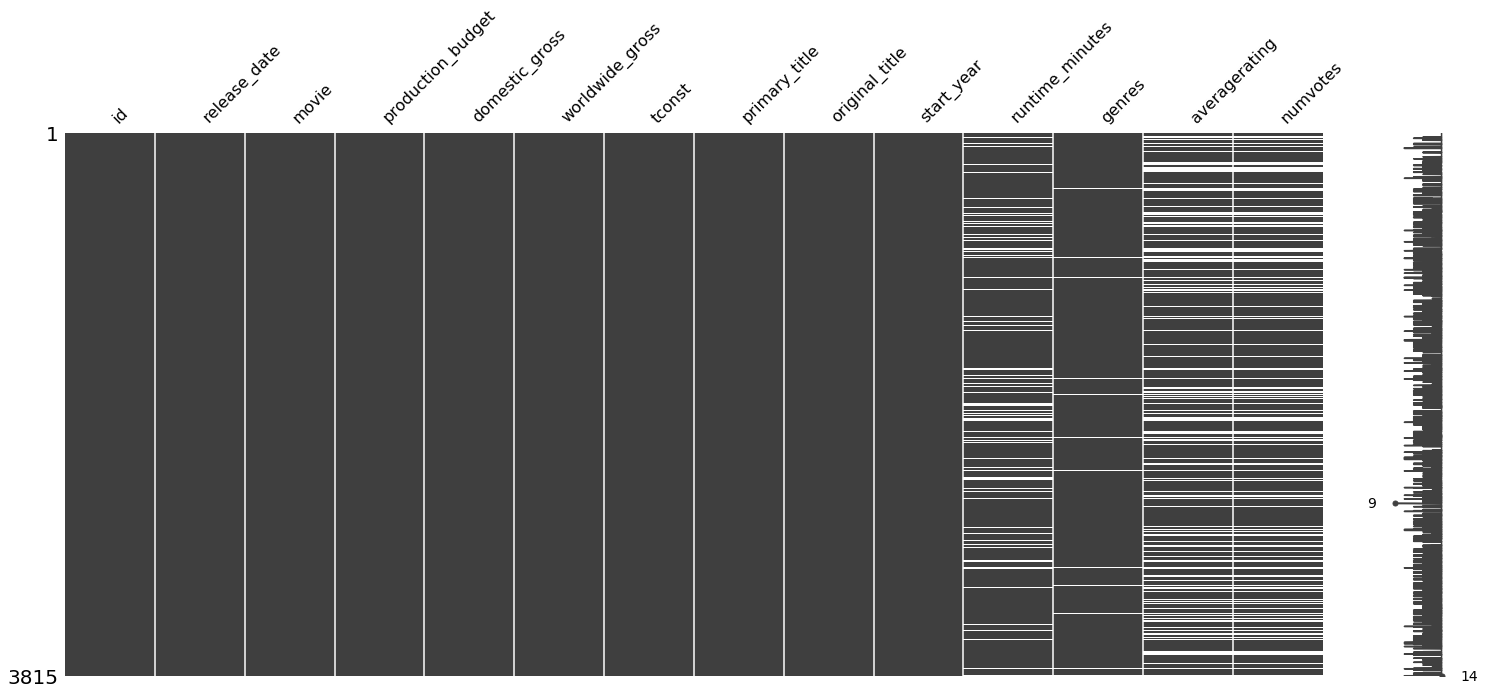

In [25]:
#graphical presentation for null values
ms.matrix(df_bud_genre)

##### Convert Object numbers to Float #####

The numbers corresponding to Budget, Gross, are in the form of objects. In order to make accurate analysis, these need to be converted to float values first. We also note that these values also have a $ symbol in the string, which needs to be eliminated for data type conversion to float. We begin with a trial on single element and then make a function to convert all numbers in object type to float type.

In [26]:
#example eliment
test_value = df_bud_genre['production_budget'][0]
test_value

'$425,000,000'

In [27]:
#eliminating "$" and "," , followed by converting the vaue into a float
float(test_value.replace('$','').replace(',',''))

425000000.0

In [28]:
def to_float(series):
    """Takes a pandas series having financial values and converts its type to float"""
    return series.map(lambda x: float(x.replace('$','').replace(',','')))

And now using this function, we convert all relevant tables into float values:

In [29]:
df_bud_genre['production_budget'] = to_float(df_bud_genre['production_budget'])

In [30]:
df_bud_genre['domestic_gross']=to_float(df_bud_genre['domestic_gross'])

In [31]:
df_bud_genre['worldwide_gross'] = to_float(df_bud_genre['worldwide_gross'])

In [32]:
#testing the data types
df_bud_genre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3815 entries, 0 to 3814
Data columns (total 14 columns):
id                   3815 non-null int64
release_date         3815 non-null object
movie                3815 non-null object
production_budget    3815 non-null float64
domestic_gross       3815 non-null float64
worldwide_gross      3815 non-null float64
tconst               3815 non-null object
primary_title        3815 non-null object
original_title       3814 non-null object
start_year           3815 non-null int64
runtime_minutes      3328 non-null float64
genres               3743 non-null object
averagerating        2875 non-null float64
numvotes             2875 non-null float64
dtypes: float64(6), int64(2), object(6)
memory usage: 607.1+ KB


##### Initial analysis of the main data frame using Scatter Matrix #####

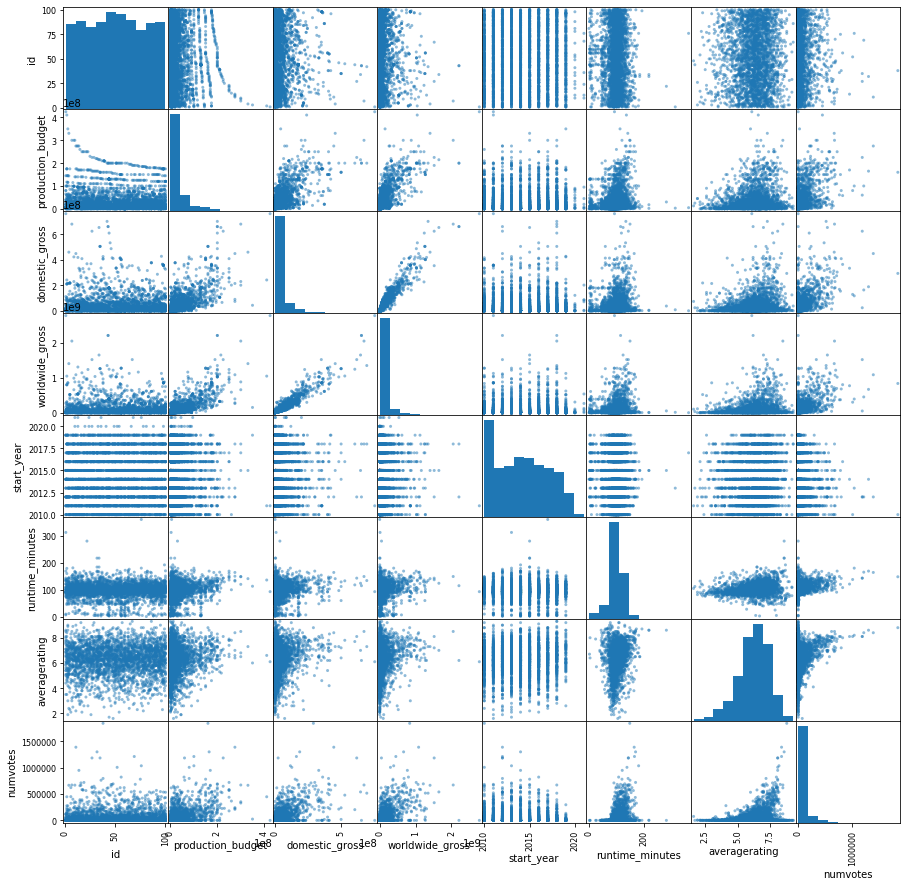

In [33]:
pd.plotting.scatter_matrix(df_bud_genre, figsize=(15,15));

# Data Analysis #

## What Genre to Debut in?

### Budget and Gross with Genre ###
table_1

#### Separating Movies into Different Genres ####

##### Making a List of Total Genres #####

Exploring the genre string on one element and then creating a for loop to create a list of unique genres

In [34]:
#Separating the Genre String into separate genres
df_bud_genre['genres'][1].split(',')

['Action', 'Adventure', 'Fantasy']

In [35]:
#Creating a list of unique Genres
all_genres = []
for genre in df_bud_genre['genres']:
    #Avoid null values of genre by using if statement
    if genre:
        #Avoid running into error where type(Genre) != string using another if statement
        if type(genre)==str:
            genres = genre.split(',')
            #add all genres for each movie in list all_genres
            for i in range(len(genres)):
                all_genres.append(genres[i])
#list out the unique genres
unique_genres = set(all_genres)
unique_genres

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western'}

In [36]:
df_bud_genre['genres'].str.contains('Action').sum()

710

##### Making a table for budget and gross: separate for each genre#####

We will be creating a function similar to "Vlookup" where we will go down and check for a particular genre, go right to the index of that row, and print out the value of budget, and gross for that row.

In [37]:
# Checking if index is in continuous numerical order
a = df_bud_genre['genres']
list_=[valu for valu, no in enumerate(a)]
b = list(df_bud_genre.index)
b==list_

True

Try for one genre and then build a function based on this so as to use across all genres:

In [38]:
#A dictionary with budgets, and gross values for genre "Action"
action_budget_gross = {}

#Creating dictionary value as a list of budgets for dictionary key "Budget"
action_budget_gross['Budget']=[]
for index, genre in enumerate(df_bud_genre['genres'].str.contains('Action')):
    if genre:
        action_budget_gross['Budget'].append(df_bud_genre['production_budget'][index])

#Creating dictionary value as a list of Worldwide Gross for dictionary key "Worldwide Gross"
action_budget_gross['Worldwide Gross']=[]
for index, genre in enumerate(df_bud_genre['genres'].str.contains('Action')):
    if genre:
        action_budget_gross['Worldwide Gross'].append(df_bud_genre['worldwide_gross'][index])

#Creating dictionary value as a list of Domestic Gross for dictionary key "Domestic Gross"
action_budget_gross['Domestic Gross']=[]
for index, genre in enumerate(df_bud_genre['genres'].str.contains('Action')):
    if genre:
        action_budget_gross['Domestic Gross'].append(df_bud_genre['domestic_gross'][index])

#Converting our dictionary into pandas dataframe
df_action_bg = pd.DataFrame(action_budget_gross)
df_action_bg

,Budget,Worldwide Gross,Domestic Gross
0,410600000.0,1.045664e+09,241063875.0
1,350000000.0,1.497624e+08,42762350.0
2,330600000.0,1.403014e+09,459005868.0
3,300000000.0,2.048134e+09,678815482.0
4,300000000.0,6.559452e+08,229024295.0
...,...,...,...
777,75000.0,0.000000e+00,0.0
778,70000.0,3.031200e+04,30312.0
779,25000.0,4.897920e+05,0.0
780,10000.0,9.459600e+04,94596.0


And now, creating a function with the above for loop:

In [39]:
def genre_bg(a_genre = ''):
    """Takes a genre and returns a DF with data of budget and gross values"""
    
    budget_gross = {}
    budget_gross['Genre']=a_genre
    
    budget_gross['Budget']=[]
    for index, genre in enumerate(df_bud_genre['genres'].str.contains(a_genre)):
        if genre:
            budget_gross['Budget'].append(df_bud_genre['production_budget'][index])


    budget_gross['Worldwide Gross']=[]
    for index, genre in enumerate(df_bud_genre['genres'].str.contains(a_genre)):
        if genre:
            budget_gross['Worldwide Gross'].append(df_bud_genre['worldwide_gross'][index])


    budget_gross['Domestic Gross']=[]
    for index, genre in enumerate(df_bud_genre['genres'].str.contains(a_genre)):
        if genre:
            budget_gross['Domestic Gross'].append(df_bud_genre['domestic_gross'][index])


    budget_gross = pd.DataFrame(budget_gross)
    return budget_gross

In [40]:
#testing the function
genre_bg(a_genre = 'Action')

,Genre,Budget,Worldwide Gross,Domestic Gross
0,Action,410600000.0,1.045664e+09,241063875.0
1,Action,350000000.0,1.497624e+08,42762350.0
2,Action,330600000.0,1.403014e+09,459005868.0
3,Action,300000000.0,2.048134e+09,678815482.0
4,Action,300000000.0,6.559452e+08,229024295.0
...,...,...,...,...
777,Action,75000.0,0.000000e+00,0.0
778,Action,70000.0,3.031200e+04,30312.0
779,Action,25000.0,4.897920e+05,0.0
780,Action,10000.0,9.459600e+04,94596.0


Displaying separate tables for all unique genres:

In [41]:
for x in unique_genres:
    df_1 = genre_bg(a_genre = x)
#     df_1['Genre'] = x
    df_1 = df_1[['Genre', 'Budget', 'Worldwide Gross', 'Domestic Gross']]
    print(color.BOLD + color.UNDERLINE + x + color.END)
    display(df_1)

Family


,Genre,Budget,Worldwide Gross,Domestic Gross
0,Family,250000000.0,1.017004e+09,303003568.0
1,Family,210000000.0,3.224590e+08,105487148.0
2,Family,99000000.0,8.474744e+07,30824628.0
3,Family,200000000.0,2.208208e+09,659363944.0
4,Family,200000000.0,1.025491e+09,334191110.0
...,...,...,...,...
271,Family,100000.0,0.000000e+00,0.0
272,Family,70000.0,3.031200e+04,30312.0
273,Family,25000.0,4.897920e+05,0.0
274,Family,10000.0,9.459600e+04,94596.0


Adventure


,Genre,Budget,Worldwide Gross,Domestic Gross
0,Adventure,410600000.0,1.045664e+09,241063875.0
1,Adventure,350000000.0,1.497624e+08,42762350.0
2,Adventure,330600000.0,1.403014e+09,459005868.0
3,Adventure,300000000.0,2.048134e+09,678815482.0
4,Adventure,300000000.0,6.559452e+08,229024295.0
...,...,...,...,...
557,Adventure,70000.0,3.031200e+04,30312.0
558,Adventure,25000.0,4.897920e+05,0.0
559,Adventure,25000.0,0.000000e+00,0.0
560,Adventure,10000.0,9.459600e+04,94596.0


Thriller


,Genre,Budget,Worldwide Gross,Domestic Gross
0,Thriller,300000000.0,8.796209e+08,200074175.0
1,Thriller,275000000.0,1.084439e+09,448139099.0
2,Thriller,250000000.0,1.234846e+09,225764765.0
3,Thriller,210000000.0,3.224590e+08,105487148.0
4,Thriller,210000000.0,3.224590e+08,105487148.0
...,...,...,...,...
661,Thriller,17300.0,0.000000e+00,0.0
662,Thriller,10000.0,9.459600e+04,94596.0
663,Thriller,10000.0,5.270000e+02,527.0
664,Thriller,7000.0,0.000000e+00,0.0


Sport


,Genre,Budget,Worldwide Gross,Domestic Gross
0,Sport,210000000.0,322459006.0,105487148.0
1,Sport,99000000.0,84747441.0,30824628.0
2,Sport,175000000.0,854235992.0,356461711.0
3,Sport,175000000.0,854235992.0,356461711.0
4,Sport,175000000.0,798008101.0,209726015.0
...,...,...,...,...
142,Sport,100000.0,0.0,0.0
143,Sport,70000.0,30312.0,30312.0
144,Sport,25000.0,489792.0,0.0
145,Sport,10000.0,94596.0,94596.0


Drama


,Genre,Budget,Worldwide Gross,Domestic Gross
0,Drama,210000000.0,322459006.0,105487148.0
1,Drama,210000000.0,322459006.0,105487148.0
2,Drama,210000000.0,322459006.0,105487148.0
3,Drama,99000000.0,84747441.0,30824628.0
4,Drama,99000000.0,84747441.0,30824628.0
...,...,...,...,...
1884,Drama,10000.0,94596.0,94596.0
1885,Drama,10000.0,94596.0,94596.0
1886,Drama,10000.0,527.0,527.0
1887,Drama,9000.0,4584.0,4584.0


Reality-TV


,Genre,Budget,Worldwide Gross,Domestic Gross
0,Reality-TV,210000000.0,322459006.0,105487148.0
1,Reality-TV,99000000.0,84747441.0,30824628.0
2,Reality-TV,175000000.0,854235992.0,356461711.0
3,Reality-TV,175000000.0,854235992.0,356461711.0
4,Reality-TV,175000000.0,798008101.0,209726015.0
...,...,...,...,...
68,Reality-TV,100000.0,0.0,0.0
69,Reality-TV,70000.0,30312.0,30312.0
70,Reality-TV,25000.0,489792.0,0.0
71,Reality-TV,10000.0,94596.0,94596.0


Animation


,Genre,Budget,Worldwide Gross,Domestic Gross
0,Animation,260000000.0,5.864772e+08,200821936.0
1,Animation,210000000.0,3.224590e+08,105487148.0
2,Animation,99000000.0,8.474744e+07,30824628.0
3,Animation,200000000.0,1.242521e+09,608581744.0
4,Animation,200000000.0,1.021215e+09,486295561.0
...,...,...,...,...
215,Animation,100000.0,0.000000e+00,0.0
216,Animation,70000.0,3.031200e+04,30312.0
217,Animation,25000.0,4.897920e+05,0.0
218,Animation,10000.0,9.459600e+04,94596.0


History


,Genre,Budget,Worldwide Gross,Domestic Gross
0,History,210000000.0,322459006.0,105487148.0
1,History,210000000.0,322459006.0,105487148.0
2,History,99000000.0,84747441.0,30824628.0
3,History,99000000.0,84747441.0,30824628.0
4,History,175000000.0,854235992.0,356461711.0
...,...,...,...,...
163,History,100000.0,0.0,0.0
164,History,70000.0,30312.0,30312.0
165,History,25000.0,489792.0,0.0
166,History,10000.0,94596.0,94596.0


Crime


,Genre,Budget,Worldwide Gross,Domestic Gross
0,Crime,250000000.0,1.234846e+09,225764765.0
1,Crime,210000000.0,3.224590e+08,105487148.0
2,Crime,99000000.0,8.474744e+07,30824628.0
3,Crime,190000000.0,1.518723e+09,353007020.0
4,Crime,175000000.0,8.542360e+08,356461711.0
...,...,...,...,...
465,Crime,50000.0,0.000000e+00,0.0
466,Crime,25000.0,4.897920e+05,0.0
467,Crime,25000.0,0.000000e+00,0.0
468,Crime,10000.0,9.459600e+04,94596.0


Sci-Fi


,Genre,Budget,Worldwide Gross,Domestic Gross
0,Sci-Fi,350000000.0,1.497624e+08,42762350.0
1,Sci-Fi,330600000.0,1.403014e+09,459005868.0
2,Sci-Fi,300000000.0,2.048134e+09,678815482.0
3,Sci-Fi,275000000.0,2.827781e+08,73058679.0
4,Sci-Fi,250000000.0,1.140069e+09,408084349.0
...,...,...,...,...
296,Sci-Fi,25000.0,4.897920e+05,0.0
297,Sci-Fi,20000.0,0.000000e+00,0.0
298,Sci-Fi,10000.0,9.459600e+04,94596.0
299,Sci-Fi,10000.0,5.270000e+02,527.0


News


,Genre,Budget,Worldwide Gross,Domestic Gross
0,News,210000000.0,322459006.0,105487148.0
1,News,99000000.0,84747441.0,30824628.0
2,News,175000000.0,854235992.0,356461711.0
3,News,175000000.0,854235992.0,356461711.0
4,News,175000000.0,798008101.0,209726015.0
...,...,...,...,...
74,News,100000.0,0.0,0.0
75,News,70000.0,30312.0,30312.0
76,News,25000.0,489792.0,0.0
77,News,10000.0,94596.0,94596.0


Biography


,Genre,Budget,Worldwide Gross,Domestic Gross
0,Biography,210000000.0,322459006.0,105487148.0
1,Biography,99000000.0,84747441.0,30824628.0
2,Biography,175000000.0,854235992.0,356461711.0
3,Biography,175000000.0,854235992.0,356461711.0
4,Biography,175000000.0,854235992.0,356461711.0
...,...,...,...,...
315,Biography,50000.0,0.0,0.0
316,Biography,25000.0,489792.0,0.0
317,Biography,20000.0,0.0,0.0
318,Biography,10000.0,94596.0,94596.0


War


,Genre,Budget,Worldwide Gross,Domestic Gross
0,War,210000000.0,322459006.0,105487148.0
1,War,99000000.0,84747441.0,30824628.0
2,War,175000000.0,854235992.0,356461711.0
3,War,175000000.0,854235992.0,356461711.0
4,War,175000000.0,798008101.0,209726015.0
...,...,...,...,...
120,War,100000.0,0.0,0.0
121,War,70000.0,30312.0,30312.0
122,War,25000.0,489792.0,0.0
123,War,10000.0,94596.0,94596.0


Music


,Genre,Budget,Worldwide Gross,Domestic Gross
0,Music,210000000.0,3.224590e+08,105487148.0
1,Music,99000000.0,8.474744e+07,30824628.0
2,Music,200000000.0,1.025491e+09,334191110.0
3,Music,3000000.0,0.000000e+00,0.0
4,Music,175000000.0,8.542360e+08,356461711.0
...,...,...,...,...
186,Music,100000.0,0.000000e+00,0.0
187,Music,70000.0,3.031200e+04,30312.0
188,Music,25000.0,4.897920e+05,0.0
189,Music,10000.0,9.459600e+04,94596.0


Musical


,Genre,Budget,Worldwide Gross,Domestic Gross
0,Musical,210000000.0,3.224590e+08,105487148.0
1,Musical,99000000.0,8.474744e+07,30824628.0
2,Musical,200000000.0,1.025491e+09,334191110.0
3,Musical,3000000.0,0.000000e+00,0.0
4,Musical,175000000.0,8.542360e+08,356461711.0
...,...,...,...,...
102,Musical,100000.0,0.000000e+00,0.0
103,Musical,70000.0,3.031200e+04,30312.0
104,Musical,25000.0,4.897920e+05,0.0
105,Musical,10000.0,9.459600e+04,94596.0


Mystery


,Genre,Budget,Worldwide Gross,Domestic Gross
0,Mystery,210000000.0,322459006.0,105487148.0
1,Mystery,99000000.0,84747441.0,30824628.0
2,Mystery,185000000.0,259357408.0,92054159.0
3,Mystery,175000000.0,854235992.0,356461711.0
4,Mystery,175000000.0,854235992.0,356461711.0
...,...,...,...,...
316,Mystery,25000.0,489792.0,0.0
317,Mystery,25000.0,0.0,0.0
318,Mystery,25000.0,0.0,0.0
319,Mystery,10000.0,94596.0,94596.0


Documentary


,Genre,Budget,Worldwide Gross,Domestic Gross
0,Documentary,210000000.0,3.224590e+08,105487148.0
1,Documentary,99000000.0,8.474744e+07,30824628.0
2,Documentary,200000000.0,1.025491e+09,334191110.0
3,Documentary,3000000.0,0.000000e+00,0.0
4,Documentary,180000000.0,1.800478e+08,73864507.0
...,...,...,...,...
566,Documentary,27000.0,3.547000e+03,3547.0
567,Documentary,25000.0,4.897920e+05,0.0
568,Documentary,20000.0,0.000000e+00,0.0
569,Documentary,10000.0,9.459600e+04,94596.0


Horror


,Genre,Budget,Worldwide Gross,Domestic Gross
0,Horror,425000000.0,2.776345e+09,760507625.0
1,Horror,210000000.0,3.224590e+08,105487148.0
2,Horror,99000000.0,8.474744e+07,30824628.0
3,Horror,190000000.0,5.315146e+08,202359711.0
4,Horror,178000000.0,5.295307e+08,145443742.0
...,...,...,...,...
482,Horror,10000.0,1.387110e+05,138711.0
483,Horror,10000.0,9.459600e+04,94596.0
484,Horror,10000.0,5.270000e+02,527.0
485,Horror,7000.0,0.000000e+00,0.0


Action


,Genre,Budget,Worldwide Gross,Domestic Gross
0,Action,410600000.0,1.045664e+09,241063875.0
1,Action,350000000.0,1.497624e+08,42762350.0
2,Action,330600000.0,1.403014e+09,459005868.0
3,Action,300000000.0,2.048134e+09,678815482.0
4,Action,300000000.0,6.559452e+08,229024295.0
...,...,...,...,...
777,Action,75000.0,0.000000e+00,0.0
778,Action,70000.0,3.031200e+04,30312.0
779,Action,25000.0,4.897920e+05,0.0
780,Action,10000.0,9.459600e+04,94596.0


Western


,Genre,Budget,Worldwide Gross,Domestic Gross
0,Western,275000000.0,260002115.0,89302115.0
1,Western,210000000.0,322459006.0,105487148.0
2,Western,99000000.0,84747441.0,30824628.0
3,Western,175000000.0,854235992.0,356461711.0
4,Western,175000000.0,854235992.0,356461711.0
...,...,...,...,...
92,Western,100000.0,0.0,0.0
93,Western,70000.0,30312.0,30312.0
94,Western,25000.0,489792.0,0.0
95,Western,10000.0,94596.0,94596.0


Romance


,Genre,Budget,Worldwide Gross,Domestic Gross
0,Romance,210000000.0,322459006.0,105487148.0
1,Romance,99000000.0,84747441.0,30824628.0
2,Romance,190000000.0,351040419.0,144840419.0
3,Romance,7000000.0,26533200.0,26533200.0
4,Romance,175000000.0,854235992.0,356461711.0
...,...,...,...,...
439,Romance,50000.0,424149.0,391674.0
440,Romance,25000.0,489792.0,0.0
441,Romance,22000.0,0.0,0.0
442,Romance,10000.0,94596.0,94596.0


Fantasy


,Genre,Budget,Worldwide Gross,Domestic Gross
0,Fantasy,410600000.0,1.045664e+09,241063875.0
1,Fantasy,300000000.0,6.559452e+08,229024295.0
2,Fantasy,275000000.0,3.931513e+08,213767512.0
3,Fantasy,250000000.0,8.675003e+08,330360194.0
4,Fantasy,250000000.0,1.017004e+09,303003568.0
...,...,...,...,...
269,Fantasy,100000.0,0.000000e+00,0.0
270,Fantasy,70000.0,3.031200e+04,30312.0
271,Fantasy,25000.0,4.897920e+05,0.0
272,Fantasy,10000.0,9.459600e+04,94596.0


Comedy


,Genre,Budget,Worldwide Gross,Domestic Gross
0,Comedy,260000000.0,5.864772e+08,200821936.0
1,Comedy,215000000.0,6.542135e+08,179020854.0
2,Comedy,210000000.0,3.224590e+08,105487148.0
3,Comedy,99000000.0,8.474744e+07,30824628.0
4,Comedy,200000000.0,1.021215e+09,486295561.0
...,...,...,...,...
909,Comedy,20000.0,0.000000e+00,0.0
910,Comedy,10000.0,1.387110e+05,138711.0
911,Comedy,10000.0,9.459600e+04,94596.0
912,Comedy,10000.0,5.270000e+02,527.0


##### Creating a table with all genres and values for budget and gross #####
- table_1

Using the function "genre_bg", we can now create a table with individual genres and corresponding financial values by first creating a list of all the data tables corresponding to individual unique genres and then using the concat() method to join each data table onto each other to make the final table, "table_1"

In [42]:
#creating a list of all data tables corresponding to each unique genre
tables_list = []
for x in unique_genres:
    df_1 = genre_bg(a_genre = x)
    # Including Genre name in the table
    df_1['Genre'] = x
    #rearranging the columns in the dataframe
    df_1 = df_1[['Genre', 'Budget', 'Worldwide Gross', 'Domestic Gross']]
    tables_list.append(df_1)
tables_list

[      Genre       Budget  Worldwide Gross  Domestic Gross
 0    Family  250000000.0     1.017004e+09     303003568.0
 1    Family  210000000.0     3.224590e+08     105487148.0
 2    Family   99000000.0     8.474744e+07      30824628.0
 3    Family  200000000.0     2.208208e+09     659363944.0
 4    Family  200000000.0     1.025491e+09     334191110.0
 ..      ...          ...              ...             ...
 271  Family     100000.0     0.000000e+00             0.0
 272  Family      70000.0     3.031200e+04         30312.0
 273  Family      25000.0     4.897920e+05             0.0
 274  Family      10000.0     9.459600e+04         94596.0
 275  Family      10000.0     5.270000e+02           527.0
 
 [276 rows x 4 columns],
          Genre       Budget  Worldwide Gross  Domestic Gross
 0    Adventure  410600000.0     1.045664e+09     241063875.0
 1    Adventure  350000000.0     1.497624e+08      42762350.0
 2    Adventure  330600000.0     1.403014e+09     459005868.0
 3    Adventure  

In [43]:
#combining each data frame in "table_list" to form a single data table
table_1 = genre_bg(a_genre = 'Action')
for table in tables_list:
    table_1 = pd.concat([table_1, table])
table_1

,Genre,Budget,Worldwide Gross,Domestic Gross
0,Action,410600000.0,1.045664e+09,241063875.0
1,Action,350000000.0,1.497624e+08,42762350.0
2,Action,330600000.0,1.403014e+09,459005868.0
3,Action,300000000.0,2.048134e+09,678815482.0
4,Action,300000000.0,6.559452e+08,229024295.0
...,...,...,...,...
909,Comedy,20000.0,0.000000e+00,0.0
910,Comedy,10000.0,1.387110e+05,138711.0
911,Comedy,10000.0,9.459600e+04,94596.0
912,Comedy,10000.0,5.270000e+02,527.0


#### Exploring and cleaning the Final data table "table_1" ####

##### Null Values #####

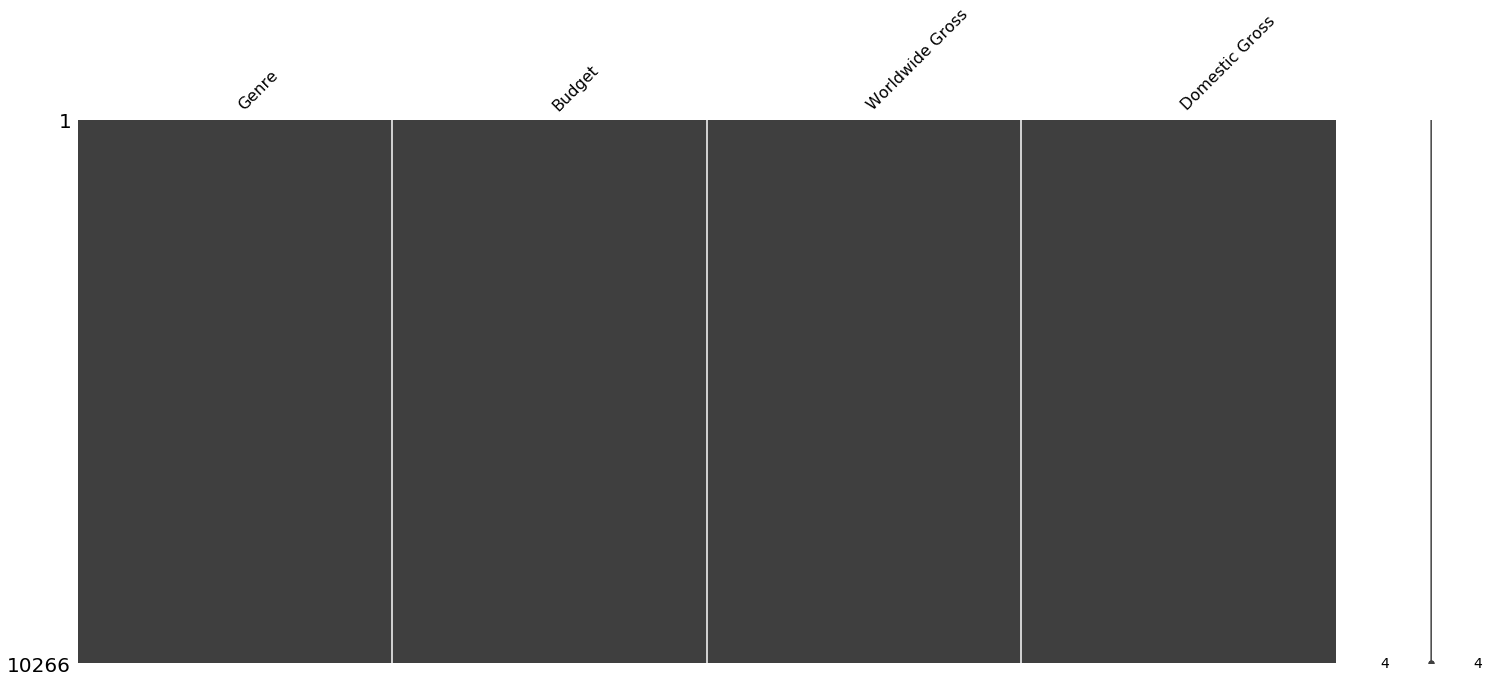

In [44]:
#Graphical representation of null values
ms.matrix(table_1);

Since we wouldnt lose a lot of data while simply dropping the genres, we can move forward with dropping these rows:

In [45]:
table_1.dropna(inplace=True)
table_1 = table_1[['Genre', 'Budget', 'Worldwide Gross', 'Domestic Gross']]
table_1

,Genre,Budget,Worldwide Gross,Domestic Gross
0,Action,410600000.0,1.045664e+09,241063875.0
1,Action,350000000.0,1.497624e+08,42762350.0
2,Action,330600000.0,1.403014e+09,459005868.0
3,Action,300000000.0,2.048134e+09,678815482.0
4,Action,300000000.0,6.559452e+08,229024295.0
...,...,...,...,...
909,Comedy,20000.0,0.000000e+00,0.0
910,Comedy,10000.0,1.387110e+05,138711.0
911,Comedy,10000.0,9.459600e+04,94596.0
912,Comedy,10000.0,5.270000e+02,527.0


In [46]:
table_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10266 entries, 0 to 913
Data columns (total 4 columns):
Genre              10266 non-null object
Budget             10266 non-null float64
Worldwide Gross    10266 non-null float64
Domestic Gross     10266 non-null float64
dtypes: float64(3), object(1)
memory usage: 401.0+ KB


#### Initial Graphical Representations ####

In [47]:
#Corelation of budget and worldwide gross for all genres
# sns.lineplot(x='Budget', y = 'Worldwide Gross', hue = 'Genre', data = table_1)

Since this plot would be difficult to read with so many genres, it make sense to analyse the top 10 genres. This is done towards the later part of this section.

Further exploring the various plots that could be used for the analysis to select the best fit:

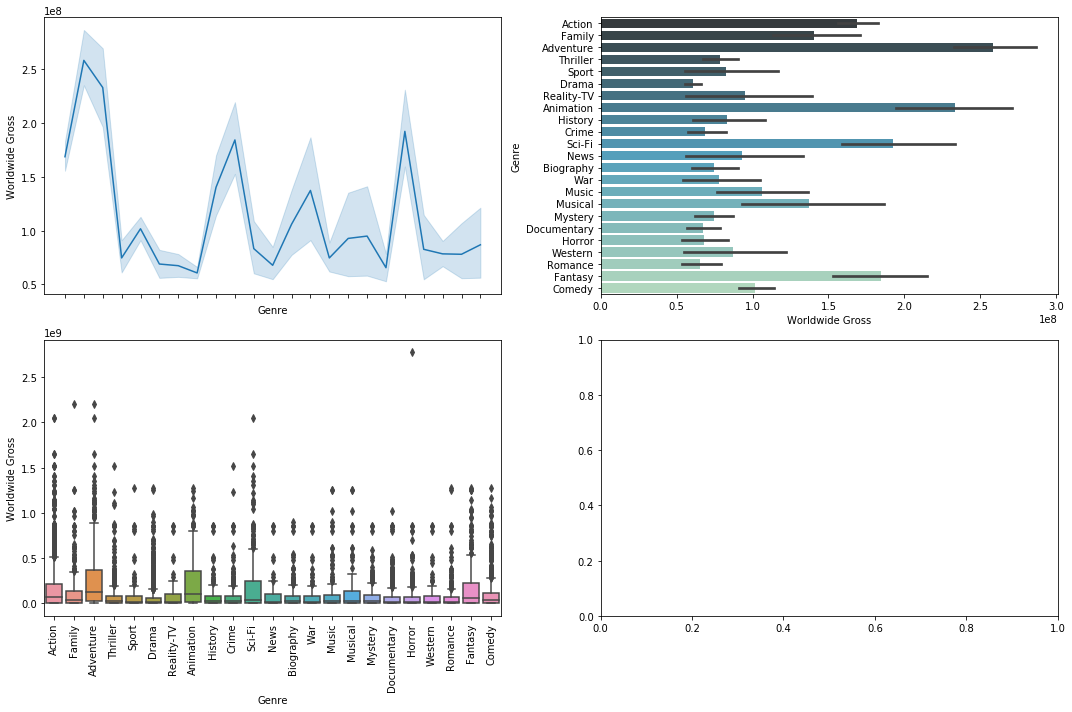

In [48]:
fig,axes =plt.subplots(ncols=2, nrows=2, figsize =(15,10))
axes = axes.flatten()
plot_1 = sns.lineplot(x='Genre', y = 'Worldwide Gross', data = table_1, ax=axes[0])
plot_1.set_xticklabels(plot_1.get_xticklabels(),rotation=90)
plot_2 = sns.barplot(y='Genre', x = 'Worldwide Gross', data = table_1, ax=axes[1], palette = "GnBu_d")
# sns.color_palette("GnBu_d")
plot_3 = sns.boxplot(x='Genre', y = 'Worldwide Gross', data = table_1, ax=axes[2])
plot_3.set_xticklabels(plot_3.get_xticklabels(),rotation=90)
# sns.swarmplot(x='Genre', y = 'Worldwide Gross', data = table_1, ax=axes[3])
plt.tight_layout();

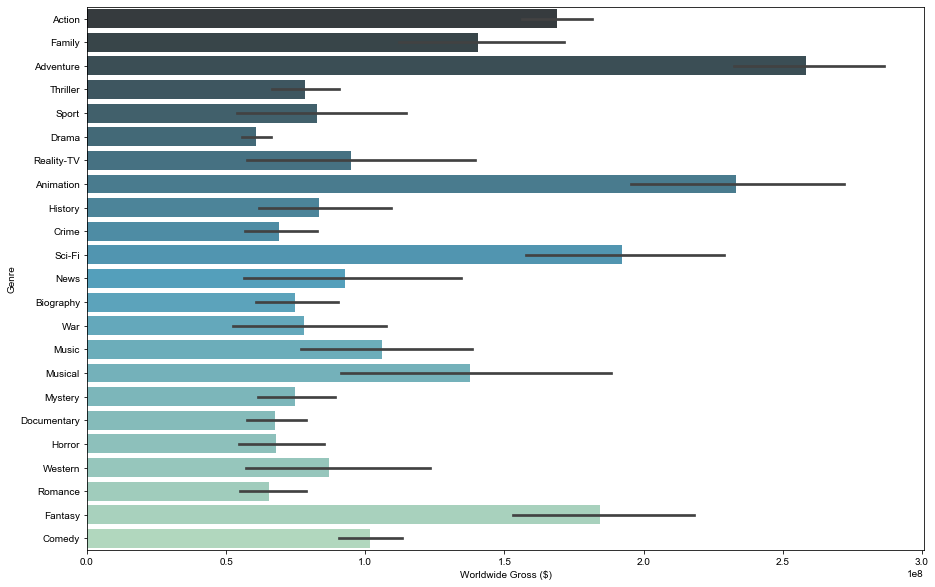

In [49]:
plt.figure(figsize = (15,10)).patch.set_alpha(0.0)
sns.barplot(y='Genre', x = 'Worldwide Gross', data = table_1, palette = "GnBu_d")
sns.set_style("dark")
plt.xlabel('Worldwide Gross ($)')
plt.savefig('genre.png', transparent=True)
# ax.set_yticklabels(table_1['Genre'], fontdict={'fontsize': 12});

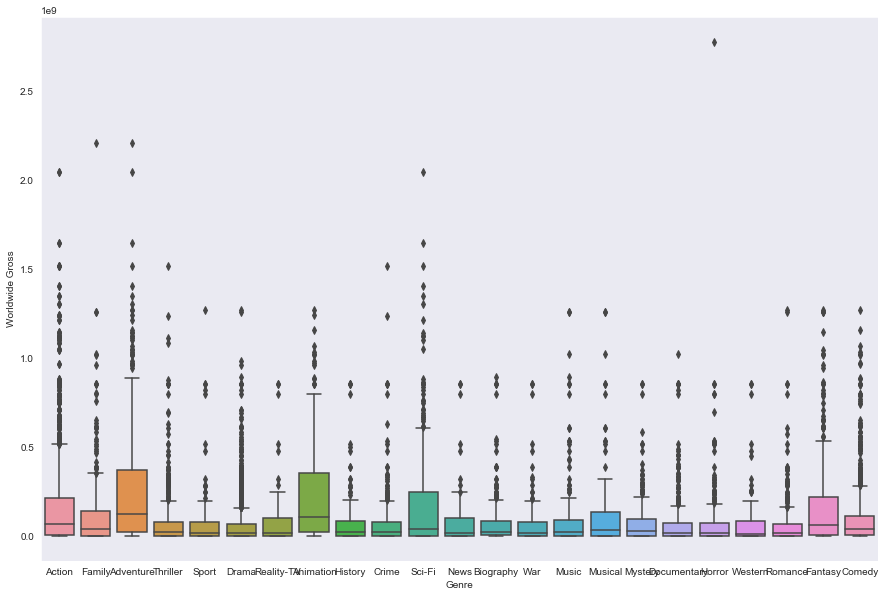

In [50]:
plt.figure(figsize = (15,10))
sns.boxplot(x='Genre', y = 'Worldwide Gross', data = table_1);

In [51]:
# plt.figure(figsize = (15,10))
# sns.swarmplot(x='Genre', y = 'Worldwide Gross', data = table_1);

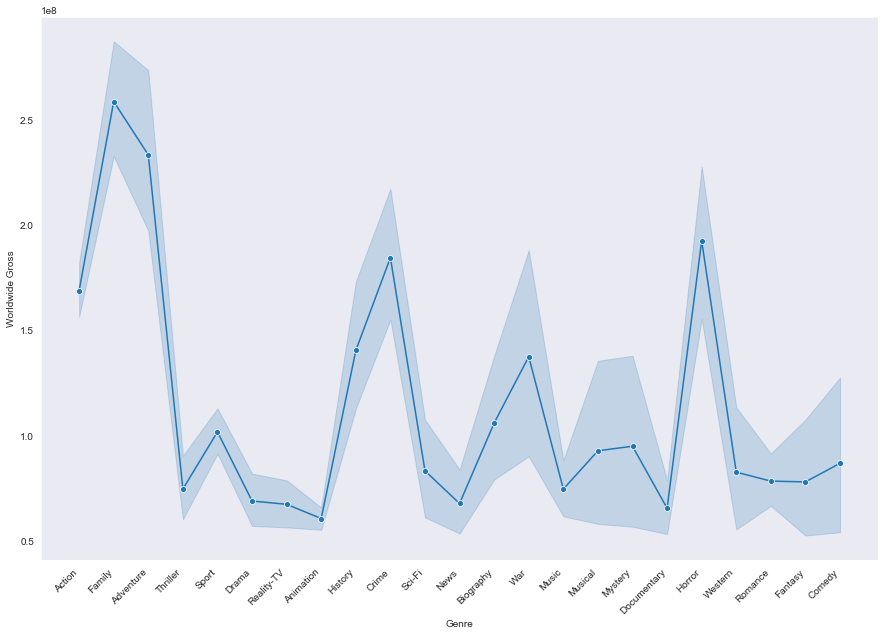

In [52]:
plt.figure(figsize = (15,10))
ax = sns.lineplot(x='Genre', y = 'Worldwide Gross', data = table_1, marker='o')
ax.set_xticklabels(plot_3.get_xticklabels(),rotation=45, horizontalalignment = 'right');

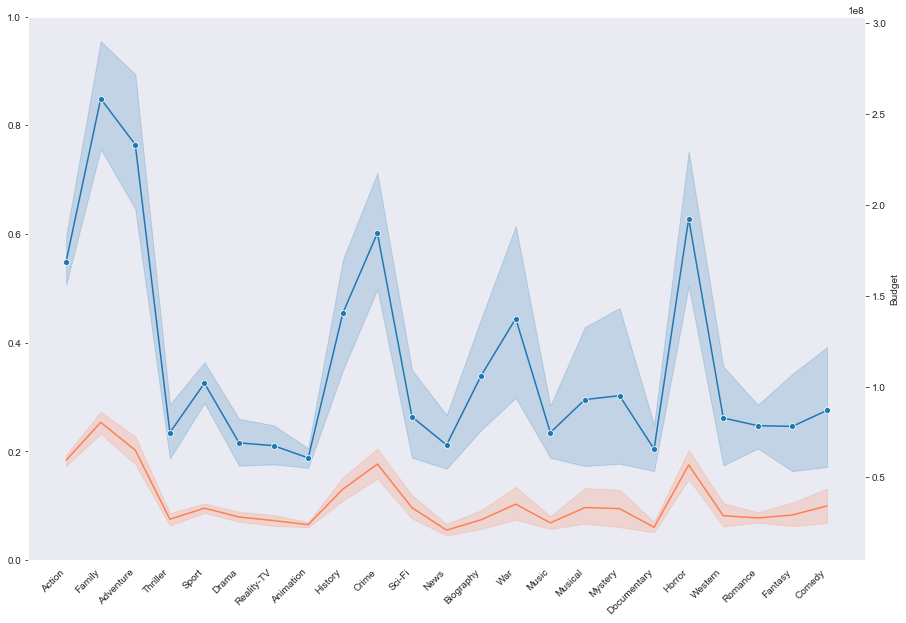

In [53]:
fig, ax = plt.subplots(figsize = (15,10))
# ax.set_aspect('equal', adjustable='box-forced')
# ax.set_adjustable('box')
ax1 = ax.twinx()
sns.lineplot(x='Genre', y = 'Worldwide Gross', data = table_1, marker='o')
sns.lineplot(x='Genre', y = 'Budget', data = table_1, ax=ax1, color='coral', linestyle = '--')
# ax.set_aspect('equal')
# ax1.set_adjustable('datalim');
# ax1.set_xticks(np.arange(0,100000000,5))
ax.set_xticklabels(plot_3.get_xticklabels(),rotation=45, horizontalalignment = 'right');

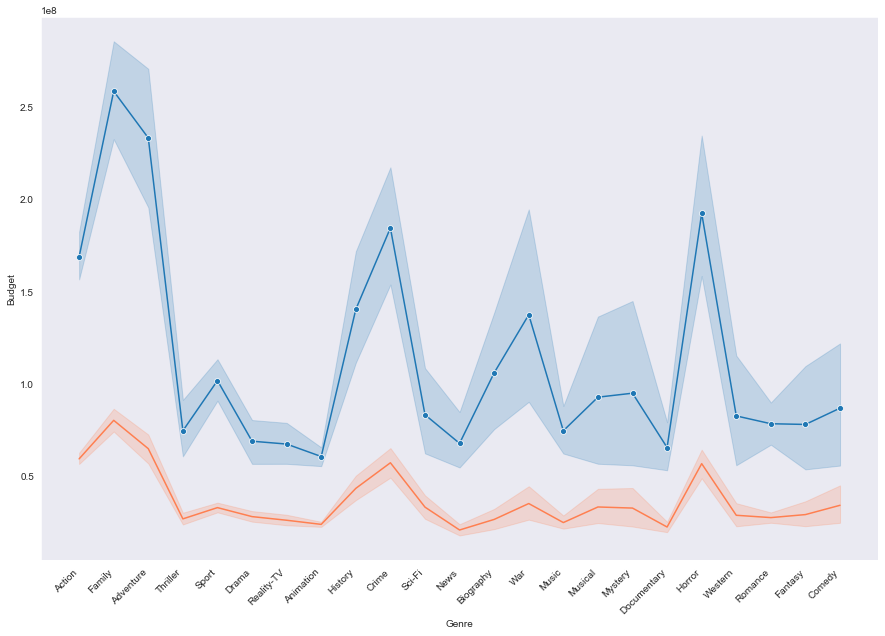

In [54]:
fig, ax = plt.subplots(figsize = (15,10))
sns.lineplot(x='Genre', y = 'Worldwide Gross', data = table_1, marker='o', ax=ax)
sns.lineplot(x='Genre', y = 'Budget', data = table_1, ax=ax, color='coral', linestyle = '--')
ax.set_xticklabels(plot_3.get_xticklabels(),rotation=45, horizontalalignment = 'right');

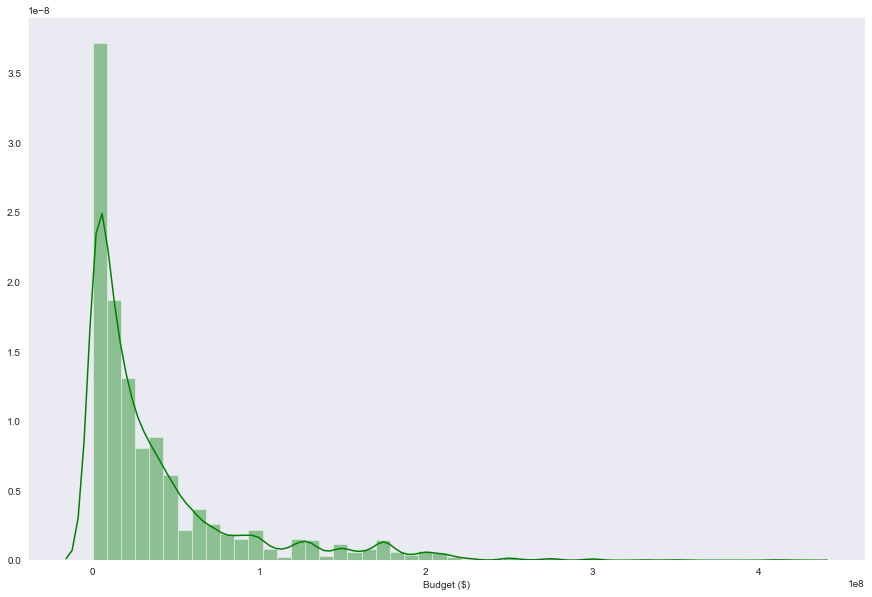

In [55]:
plt.figure(figsize = (15,10))
sns.distplot(table_1['Budget'], color = 'green')
plt.xlabel('Budget ($)')
plt.savefig('budget.png', transparent=True);

#### Exploring top 10 genres ####

To decide an aggregate to use, we analyze the data. Since the plot is skewed, grouping by median would be our best bet.

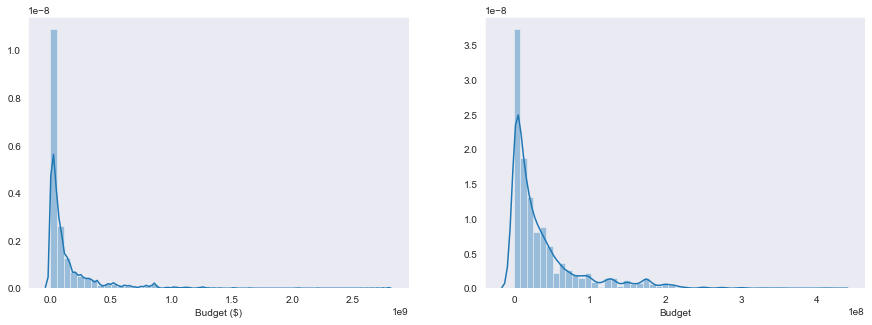

In [56]:
fig,axes =plt.subplots(ncols=2, figsize =(15,5))
sns.distplot(table_1['Worldwide Gross'], ax=axes[0])
axes[0].set_xlabel('Worldwide Gross ($)')
sns.distplot(table_1['Budget'], ax=axes[1])
axes[0].set_xlabel('Budget ($)');

In [57]:
#grouping by median
table_1a = table_1.groupby('Genre').median().sort_values('Worldwide Gross', ascending=False).head(10)

In [58]:
table_1a.reset_index(inplace = True)
table_1a

,Genre,Budget,Worldwide Gross,Domestic Gross
0,Adventure,59000000.0,122331596.5,50769315.0
1,Animation,49500000.0,105579460.0,52783965.0
2,Action,35000000.0,67045844.5,30824628.0
3,Fantasy,30000000.0,65071653.0,30176986.5
4,Sci-Fi,25000000.0,41467606.0,23022309.0
5,Family,20000000.0,39618263.5,22736642.0
6,Comedy,20000000.0,37584266.0,22543609.5
7,Musical,15000000.0,31681811.0,16779636.0
8,Mystery,12500000.0,26517819.0,14744435.0
9,Biography,18000000.0,25193458.5,12712289.5


In [59]:
table_1a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
Genre              10 non-null object
Budget             10 non-null float64
Worldwide Gross    10 non-null float64
Domestic Gross     10 non-null float64
dtypes: float64(3), object(1)
memory usage: 448.0+ bytes


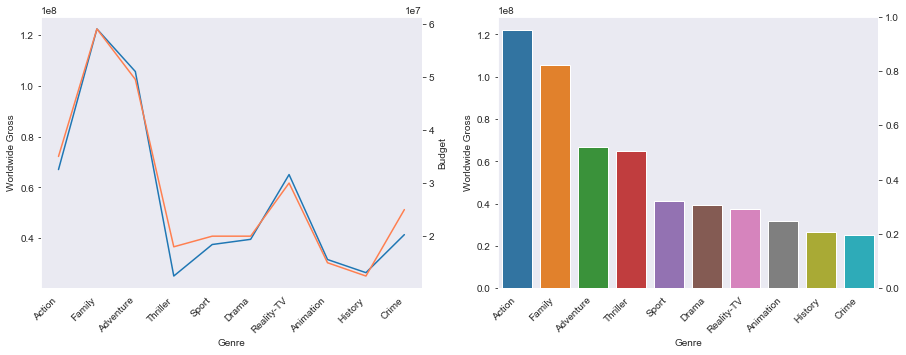

In [60]:
#Analyzing the data table
fig,axes =plt.subplots(ncols=2, figsize =(15,5))
axes = axes.flatten()
axes_0_twin = axes[0].twinx()
axes_1_twin = axes[1].twinx()
sns.lineplot(x='Genre', y = 'Worldwide Gross', data = table_1a, ax=axes[0])
sns.lineplot(x='Genre', y = 'Budget', data = table_1a, ax=axes_0_twin, color='coral', linestyle = '--')
sns.barplot(x='Genre', y = 'Worldwide Gross', data = table_1a, ax=axes[1])
axes[1].set_xticklabels(plot_3.get_xticklabels(),rotation=45, horizontalalignment = 'right')
axes[0].set_xticklabels(plot_3.get_xticklabels(),rotation=45, horizontalalignment = 'right');

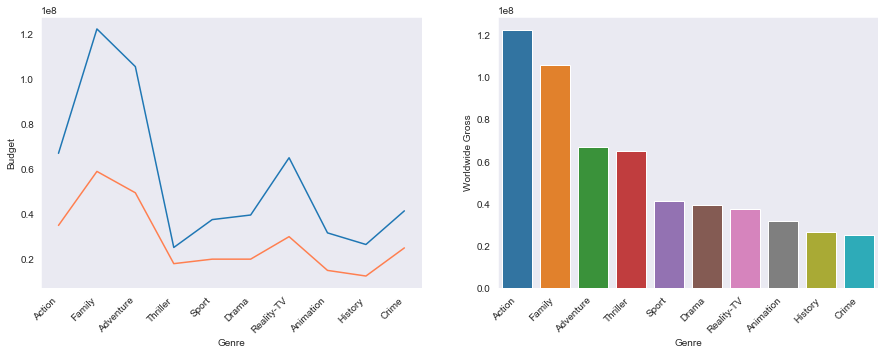

In [61]:
#plots on one axis instead of twin
fig,axes =plt.subplots(ncols=2, figsize =(15,5))
axes = axes.flatten()
sns.lineplot(x='Genre', y = 'Worldwide Gross', data = table_1a, ax=axes[0])
sns.lineplot(x='Genre', y = 'Budget', data = table_1a, ax=axes[0], color='coral', linestyle = '--')
sns.barplot(x='Genre', y = 'Worldwide Gross', data = table_1a, ax=axes[1])
axes[1].set_xticklabels(plot_3.get_xticklabels(),rotation=45, horizontalalignment = 'right')
axes[0].set_xticklabels(plot_3.get_xticklabels(),rotation=45, horizontalalignment = 'right');

In [159]:
fig = px.line_polar(table_1a, r='Worldwide Gross',theta='Genre', line_close=True)
plt.savefig('gross.png', transparent=True)
fig.show()

<Figure size 432x288 with 0 Axes>

**Individual plots**

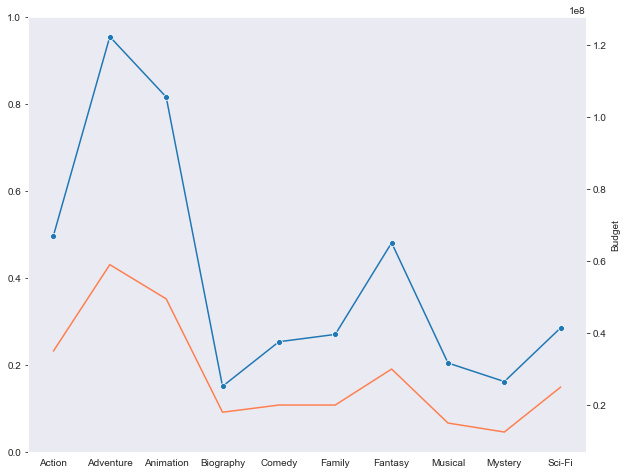

In [63]:
#on twin axes
fig, ax = plt.subplots(figsize = (10,8))
# ax.set_aspect('equal', adjustable='box-forced')
# ax.set_adjustable('box')
ax1 = ax.twinx()
sns.lineplot(x='Genre', y = 'Worldwide Gross', data = table_1a, marker='o')
sns.lineplot(x='Genre', y = 'Budget', data = table_1a, ax=ax1, color='coral', linestyle = '--')
# ax.set_aspect('equal')
# ax1.set_adjustable('datalim');
# ax1.set_xticks(np.arange(0,100000000,5))


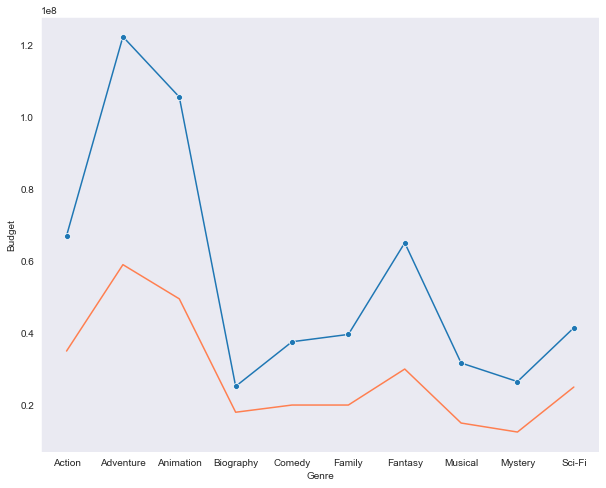

In [64]:
#on same axis
fig, ax = plt.subplots(figsize = (10,8))
sns.lineplot(x='Genre', y = 'Worldwide Gross', data = table_1a, marker='o')
sns.lineplot(x='Genre', y = 'Budget', data = table_1a, ax=ax, color='coral', linestyle = '--');


**Budget vs Gross**

In [65]:
table_1a['Genre']

0    Adventure
1    Animation
2       Action
3      Fantasy
4       Sci-Fi
5       Family
6       Comedy
7      Musical
8      Mystery
9    Biography
Name: Genre, dtype: object

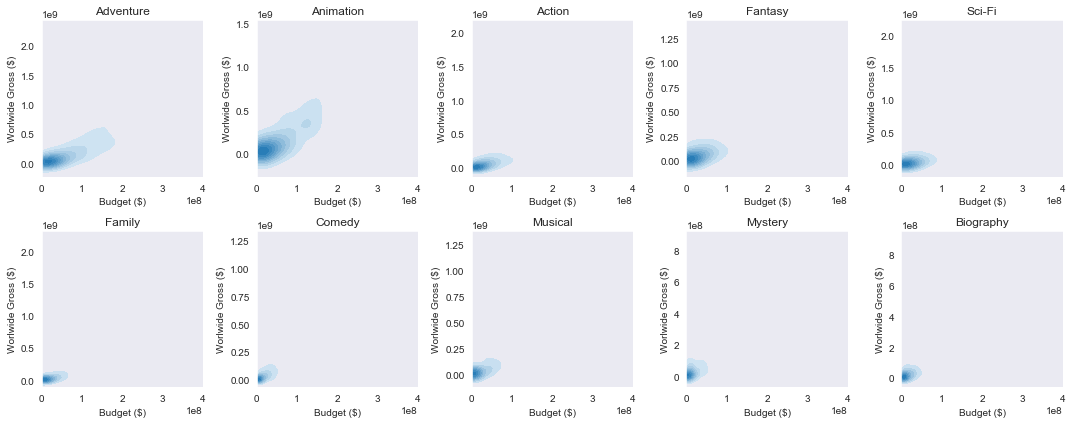

In [165]:
fig,axes =plt.subplots(ncols=5, nrows=2, figsize =(15,6))
axes = axes.flatten()
for i,j in enumerate(table_1a['Genre']):
    table = genre_bg(a_genre = j)
    sns.kdeplot(table['Budget'], table['Worldwide Gross'], shade = True, ax=axes[i],shade_lowest = False)
    axes[i].set_title(j)
#     axes[i].set_ylim(0,2e9)
    axes[i].set_xlim(0,4e8)
    axes[i].set_ylabel('Worlwide Gross ($)')
    axes[i].set_xlabel('Budget ($)');
plt.tight_layout()
# plt.savefig('bud_gross.png', transparent=True)

### Summary of Analysis ###

- **Top ten heighest grossing genres:** Adventure, Animation, Action, Fantasy, Sci-Fi, Family, Comedy, Musical, Mystery, Biography
- **Budget with Gross:**
    - **Adventure:** large spread, spread more horizontal-increasing budget not seen by equally increasing gross
    - **Animation:** Wide spread with budget similar to most top genres but comparatively higher gross
    - **Action, family, sci-fi:** smaller footprint with comparatively more budget but lesser gross
    - **Comedy, biography, mystery:** lower budget and comparatively lower gross. Small footprint
        - Mystery does have some movies that have lower budget and higher gross
    - **Musical:** Coparatively lower gross for a given budget

- Based on the radial plot, can see the heighest grossing. Recommendations based on the most gross revenue.
    
    
    

### Recomendations

- Single Genre Animation. They also cater to a larger audience.
- Multiple Genre: 
    -Animation, Adventure, Fantacy
    -Based on the gross revenue: Adventure, Action, Family

## What Should the average length of the movie be?

### Runtime and Average Rating plus Gross ###

#### Creating a table demonstrating runtime and average Ratings based on genres ####

In [67]:
def genre_table(a_genre = ''):
    """Takes a genre and returns a DF with data of budget and gross values"""
    
    budget_gross = {}
    
    budget_gross['Budget']=[]
    for index, genre in enumerate(df_bud_genre['genres'].str.contains(a_genre)):
        if genre:
            budget_gross['Budget'].append(df_bud_genre['production_budget'][index])


    budget_gross['Worldwide Gross']=[]
    for index, genre in enumerate(df_bud_genre['genres'].str.contains(a_genre)):
        if genre:
            budget_gross['Worldwide Gross'].append(df_bud_genre['worldwide_gross'][index])


    budget_gross['Domestic Gross']=[]
    for index, genre in enumerate(df_bud_genre['genres'].str.contains(a_genre)):
        if genre:
            budget_gross['Domestic Gross'].append(df_bud_genre['domestic_gross'][index])


    budget_gross['Run Time']=[]
    for index, genre in enumerate(df_bud_genre['genres'].str.contains(a_genre)):
        if genre:
            budget_gross['Run Time'].append(df_bud_genre['runtime_minutes'][index])

    
    budget_gross['Average Rating']=[]
    for index, genre in enumerate(df_bud_genre['genres'].str.contains(a_genre)):
        if genre:
            budget_gross['Average Rating'].append(df_bud_genre['averagerating'][index])

    
    budget_gross = pd.DataFrame(budget_gross)
    return budget_gross

In [68]:
genre_table(a_genre = 'Adventure')

,Budget,Worldwide Gross,Domestic Gross,Run Time,Average Rating
0,410600000.0,1.045664e+09,241063875.0,136.0,6.6
1,350000000.0,1.497624e+08,42762350.0,113.0,6.0
2,330600000.0,1.403014e+09,459005868.0,141.0,7.3
3,300000000.0,2.048134e+09,678815482.0,149.0,8.5
4,300000000.0,6.559452e+08,229024295.0,120.0,6.5
...,...,...,...,...,...
557,70000.0,3.031200e+04,30312.0,109.0,NaN
558,25000.0,4.897920e+05,0.0,92.0,NaN
559,25000.0,0.000000e+00,0.0,83.0,5.4
560,10000.0,9.459600e+04,94596.0,NaN,NaN


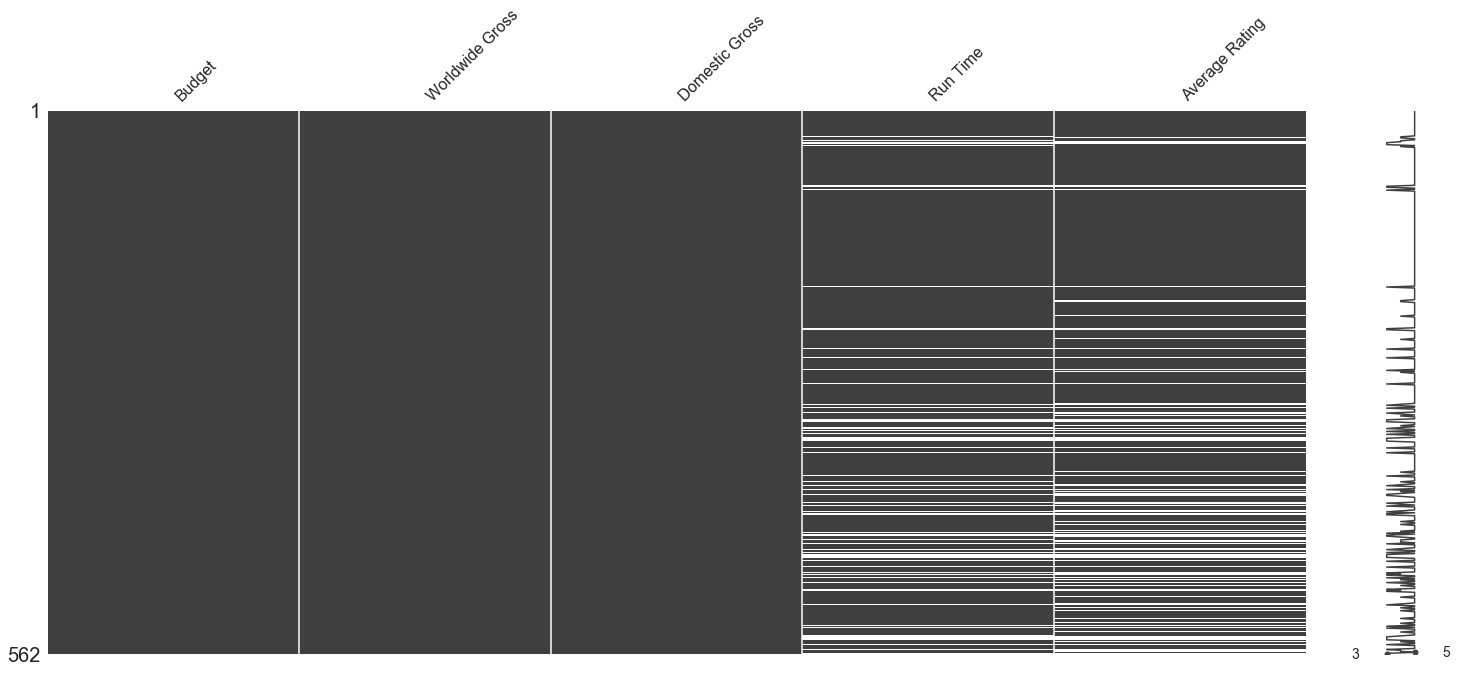

In [69]:
ms.matrix(genre_table(a_genre = 'Adventure'));

In [70]:
# rt_tables_list = []
# for x in unique_genres:
#     df_1 = genre_table(a_genre = x)
#     df_1['Genre'] = x
#     df_1 = df_1[['Run Time','Genre', 'Budget', 'Worldwide Gross', 'Domestic Gross', 'Average Rating']]
#     rt_tables_list.append(df_1)
# rt_tables_list

In [71]:
# table_2 = genre_table(a_genre = 'Action')
# for table in tables_list:
#     table_2 = pd.concat([table_2, table])
# table_2

In [72]:
# ms.matrix(table_2);

In [73]:
table_2a = df_bud_genre[['runtime_minutes', 'production_budget', 'worldwide_gross','domestic_gross','averagerating','genres']]
table_2a

,runtime_minutes,production_budget,worldwide_gross,domestic_gross,averagerating,genres
0,93.0,425000000.0,2.776345e+09,760507625.0,6.1,Horror
1,136.0,410600000.0,1.045664e+09,241063875.0,6.6,"Action,Adventure,Fantasy"
2,113.0,350000000.0,1.497624e+08,42762350.0,6.0,"Action,Adventure,Sci-Fi"
3,141.0,330600000.0,1.403014e+09,459005868.0,7.3,"Action,Adventure,Sci-Fi"
4,149.0,300000000.0,2.048134e+09,678815482.0,8.5,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...
3810,NaN,10000.0,9.459600e+04,94596.0,NaN,NaN
3811,NaN,10000.0,5.270000e+02,527.0,NaN,NaN
3812,95.0,9000.0,4.584000e+03,4584.0,6.4,"Comedy,Drama"
3813,77.0,7000.0,0.000000e+00,0.0,5.6,"Horror,Sci-Fi,Thriller"


#### Exploring and cleaning the main table: table_2a ####

##### Null Values #####

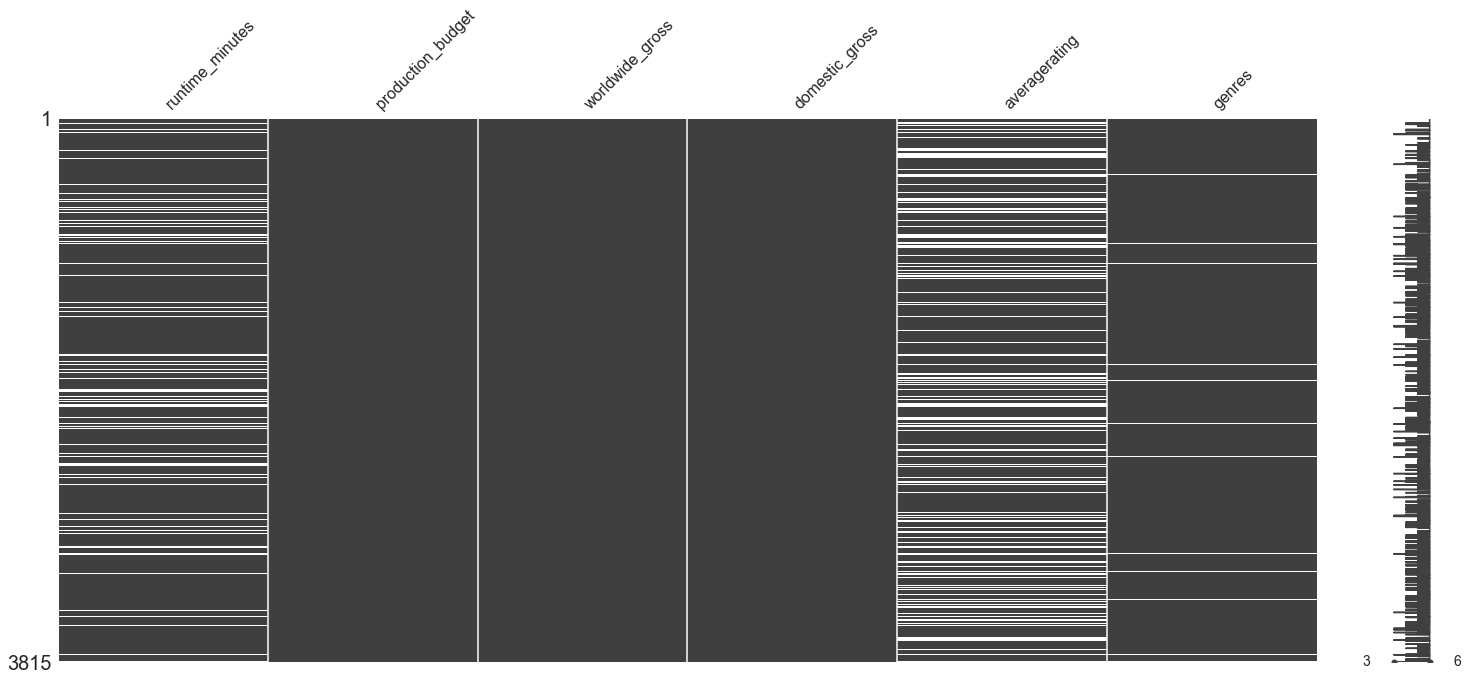

In [74]:
ms.matrix(table_2a);

In [75]:
# Checking for null percentage
table_2a.isna().sum()/len(table_2a)

runtime_minutes      0.127654
production_budget    0.000000
worldwide_gross      0.000000
domestic_gross       0.000000
averagerating        0.246396
genres               0.018873
dtype: float64

Since we have significant null values in runtime_minutes, deleting rows having null values will reduce the amount of data. This can alter the final interpretations. The best approach in this case would be to fill the null values with a median value since runtime for most movies are more or less close to each other.

In [76]:
table_2a['runtime_minutes']=table_2a['runtime_minutes'].fillna(table_2a['runtime_minutes'].median())
table_2a['averagerating']=table_2a['averagerating'].fillna(table_2a['averagerating'].median())
table_2a.isna().sum()/len(table_2a)

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



runtime_minutes      0.000000
production_budget    0.000000
worldwide_gross      0.000000
domestic_gross       0.000000
averagerating        0.000000
genres               0.018873
dtype: float64

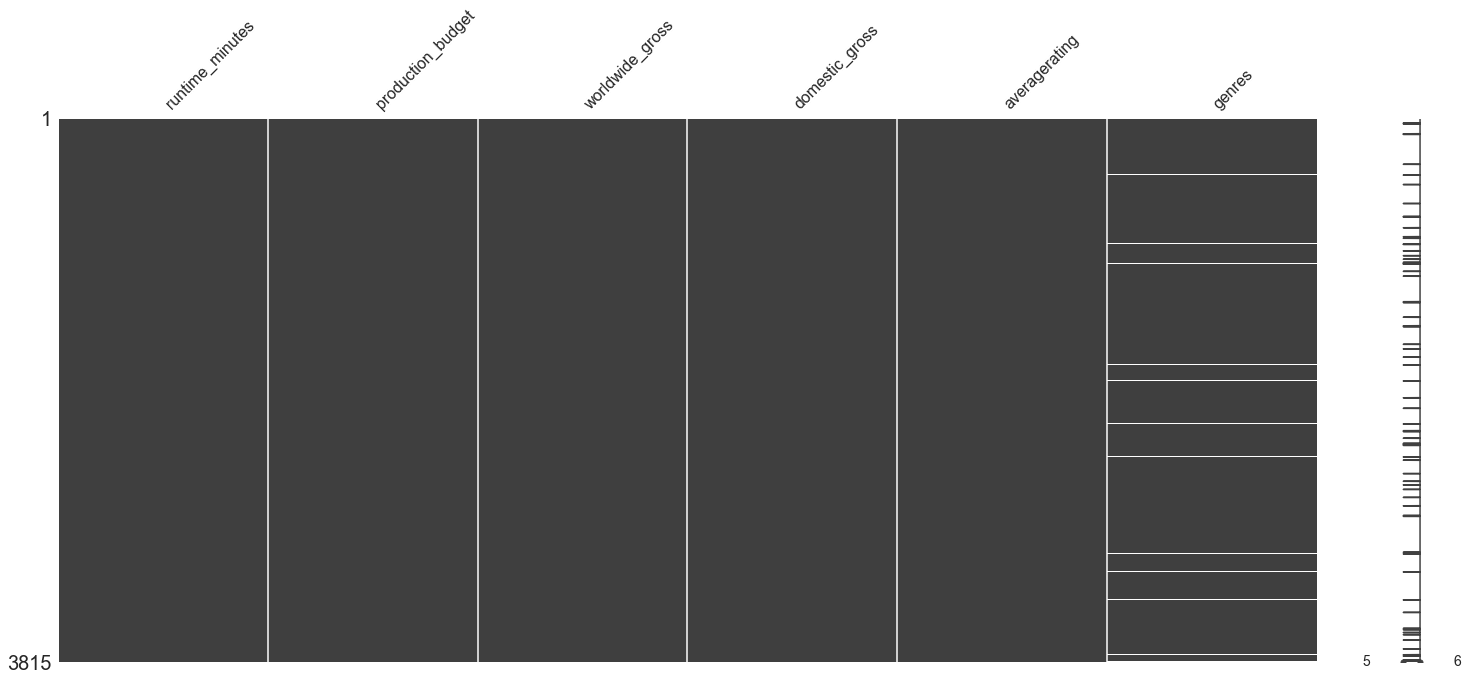

In [77]:
ms.matrix(table_2a);

In [78]:
table_2a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3815 entries, 0 to 3814
Data columns (total 6 columns):
runtime_minutes      3815 non-null float64
production_budget    3815 non-null float64
worldwide_gross      3815 non-null float64
domestic_gross       3815 non-null float64
averagerating        3815 non-null float64
genres               3743 non-null object
dtypes: float64(5), object(1)
memory usage: 368.6+ KB


#### Analysis ####

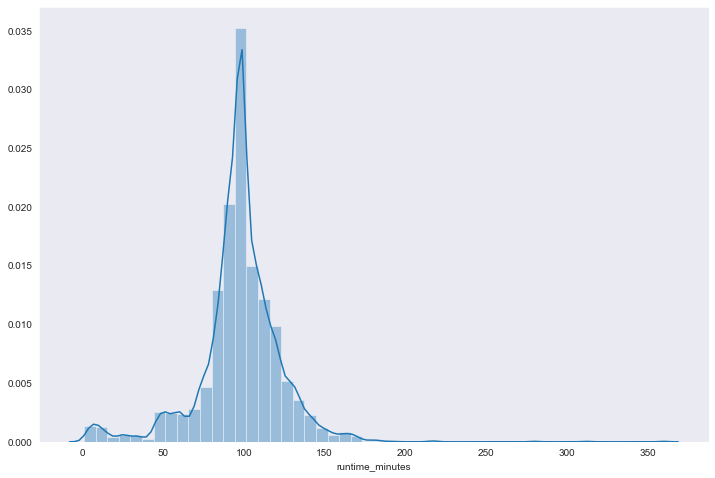

In [79]:
fig, ax = plt.subplots(figsize = (12,8))
sns.distplot(table_2a['runtime_minutes']);

In [80]:
table_2a['runtime_minutes'].describe()

count    3815.000000
mean       97.306160
std        25.716744
min         1.000000
25%        89.000000
50%        98.000000
75%       109.000000
max       360.000000
Name: runtime_minutes, dtype: float64

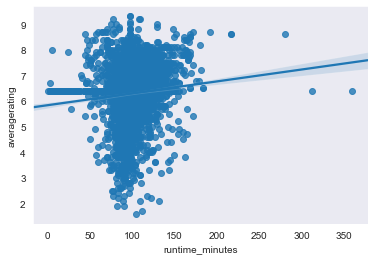

In [81]:
sns.regplot(table_2a['runtime_minutes'], table_2a['averagerating'])
plt.savefig('time_rate.png', transparent=True);

Avg rating and revenue

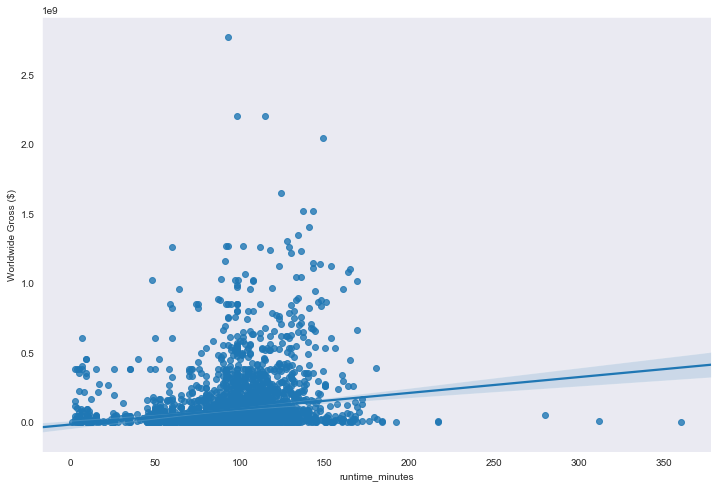

In [82]:
fig, ax = plt.subplots(figsize = (12,8))
sns.regplot(table_2a['runtime_minutes'], table_2a['worldwide_gross'])
plt.ylabel('Worldwide Gross ($)')
plt.savefig('time_gross.png', transparent=True);

### Summary ###

- Analysis show a very narrow bell plot with most of the movies lying in the range of 90-120 minutes
- Average rating remains unaffected by runtime
- Subtle variation with most high grossed movies lie in the range 100-140 mins, possible reason may include attention span and time expectation of the audience

### Recommendations

Average runtime recommended to be within the range of 100 to 130 mins

## Competetion Analysis

### STudio Analysis (Competetive Analysis) ###

#### Creating Data Table table_4

bom.movie_gross.csv.gz with genre

In [83]:
bom_movie_gross = data_tables['bom.movie_gross.csv.gz']
bom_movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [84]:
df_bud_genre

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,tt1775309,Avatar,AbatÃ¢,2011,93.0,Horror,6.1,43.0
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",6.6,447624.0
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",6.0,24451.0
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594.0
4,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,68,"Jul 6, 2001",Cure,10000.0,94596.0,9.459600e+04,tt5936960,Cure,Cure,2014,NaN,NaN,NaN,NaN
3811,70,"Apr 1, 1996",Bang,10000.0,527.0,5.270000e+02,tt6616538,Bang,Bang,2015,NaN,NaN,NaN,NaN
3812,73,"Jan 13, 2012",Newlyweds,9000.0,4584.0,4.584000e+03,tt1880418,Newlyweds,Newlyweds,2011,95.0,"Comedy,Drama",6.4,1436.0
3813,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00,tt7837402,Red 11,Red 11,2019,77.0,"Horror,Sci-Fi,Thriller",5.6,43.0


In [85]:
merged_table = bom_movie_gross.merge(df_bud_genre, left_on = 'title', right_on = 'primary_title')
merged_table

,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000,2010,47,"Jun 18, 2010",Toy Story 3,200000000.0,415004880.0,1.068880e+09,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218.0
1,Inception,WB,292600000.0,535700000,2010,38,"Jul 16, 2010",Inception,160000000.0,292576195.0,8.355246e+08,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066.0
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,27,"May 21, 2010",Shrek Forever After,165000000.0,238736787.0,7.562447e+08,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",6.3,167532.0
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,53,"Jun 30, 2010",The Twilight Saga: Eclipse,68000000.0,300531751.0,7.061028e+08,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733.0
4,Iron Man 2,Par.,312400000.0,311500000,2010,15,"May 7, 2010",Iron Man 2,170000000.0,312433331.0,6.211564e+08,tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1597,Gotti,VE,4300000.0,NaN,2018,64,"Jun 15, 2018",Gotti,10000000.0,4286367.0,6.089100e+06,tt1801552,Gotti,Gotti,2018,112.0,"Biography,Crime,Drama",4.8,10358.0
1598,Bilal: A New Breed of Hero,VE,491000.0,1700000,2018,100,"Feb 2, 2018",Bilal: A New Breed of Hero,30000000.0,490973.0,6.485990e+05,tt3576728,Bilal: A New Breed of Hero,Bilal: A New Breed of Hero,2015,105.0,"Action,Adventure,Animation",8.0,16854.0
1599,Mandy,RLJ,1200000.0,NaN,2018,71,"Sep 14, 2018",Mandy,6000000.0,1214525.0,1.427656e+06,tt4995858,Mandy,Mandy,2016,113.0,"Drama,Thriller",4.1,39.0
1600,Mandy,RLJ,1200000.0,NaN,2018,71,"Sep 14, 2018",Mandy,6000000.0,1214525.0,1.427656e+06,tt6998518,Mandy,Mandy,2018,121.0,"Action,Fantasy,Horror",6.6,44378.0


In [86]:
table_4 = merged_table[['title','studio','domestic_gross_y', 'worldwide_gross','genres']]
table_4

,title,studio,domestic_gross_y,worldwide_gross,genres
0,Toy Story 3,BV,415004880.0,1.068880e+09,"Adventure,Animation,Comedy"
1,Inception,WB,292576195.0,8.355246e+08,"Action,Adventure,Sci-Fi"
2,Shrek Forever After,P/DW,238736787.0,7.562447e+08,"Adventure,Animation,Comedy"
3,The Twilight Saga: Eclipse,Sum.,300531751.0,7.061028e+08,"Adventure,Drama,Fantasy"
4,Iron Man 2,Par.,312433331.0,6.211564e+08,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...
1597,Gotti,VE,4286367.0,6.089100e+06,"Biography,Crime,Drama"
1598,Bilal: A New Breed of Hero,VE,490973.0,6.485990e+05,"Action,Adventure,Animation"
1599,Mandy,RLJ,1214525.0,1.427656e+06,"Drama,Thriller"
1600,Mandy,RLJ,1214525.0,1.427656e+06,"Action,Fantasy,Horror"


#### Cleaning table_4a

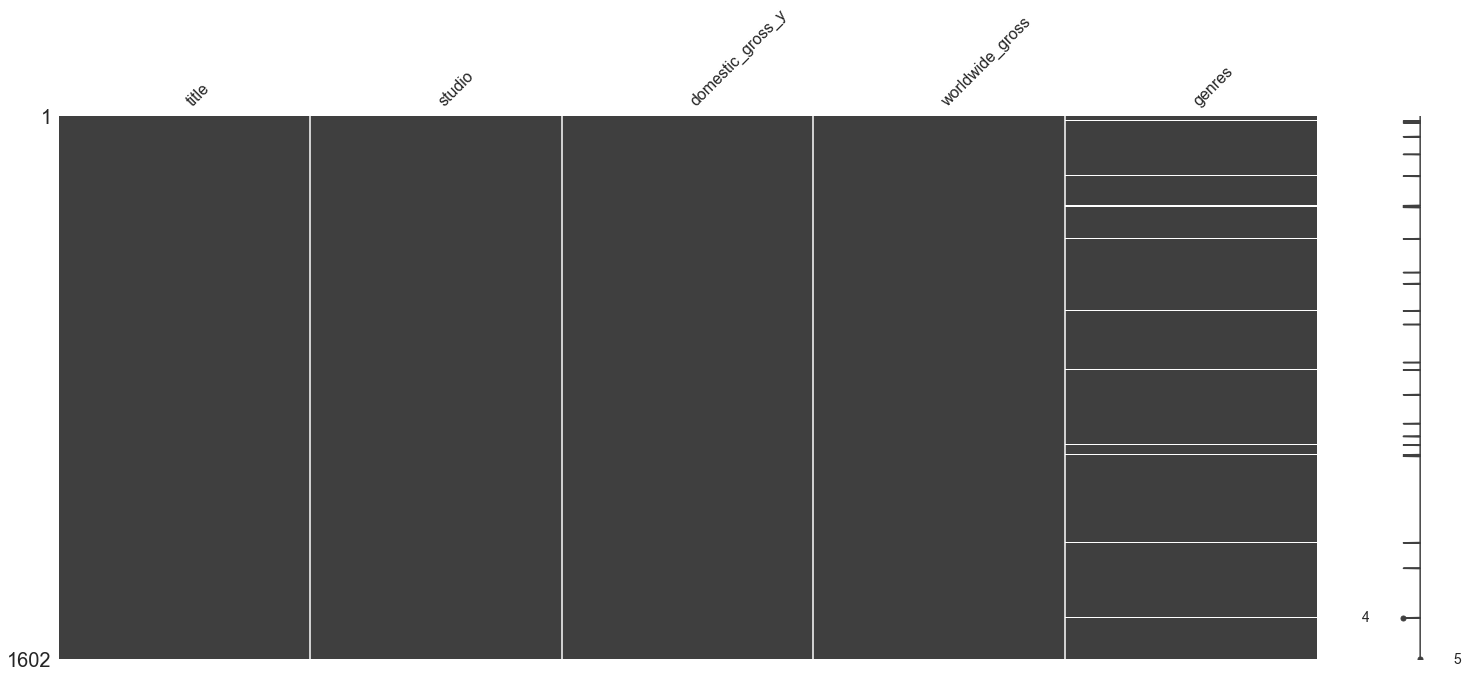

In [87]:
#Exploring null values
ms.matrix(table_4);

In [88]:
table_4.isna().sum()/len(table_4)

title               0.00000
studio              0.00000
domestic_gross_y    0.00000
worldwide_gross     0.00000
genres              0.01623
dtype: float64

In [89]:
table_4['genres']=table_4['genres'].fillna('N/A')
table_4.isna().sum()/len(table_4)

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



title               0.0
studio              0.0
domestic_gross_y    0.0
worldwide_gross     0.0
genres              0.0
dtype: float64

#### Exploring the top 7 studios

In [90]:
table_4a = table_4.groupby('studio').agg(['median','mean']).sort_values(('worldwide_gross','median'), ascending = False).head(7)
table_4a.reset_index(inplace = True)
table_4a

studio domestic_gross_y               worldwide_gross              
                      median          mean          median          mean
0      P/DW      157254783.5  1.682915e+08     524929234.5  5.078028e+08
1        BV      172558876.0  1.967659e+08     341528518.0  5.052749e+08
2  GrtIndia       18985794.0  1.898579e+07     263502914.0  2.635029e+08
3    Strand       75395035.0  7.539504e+07     174278214.0  1.742782e+08
4      Sony       71091594.0  8.847471e+07     170936470.0  2.279849e+08
5       UTV        6306929.5  6.251405e+06     152395926.0  1.502724e+08
6       MGM       82992874.0  8.299287e+07     139779636.0  1.397796e+08

##### Based on Worldwide gross

Text(0, 0.5, 'Median Worldwide Gross ($)')

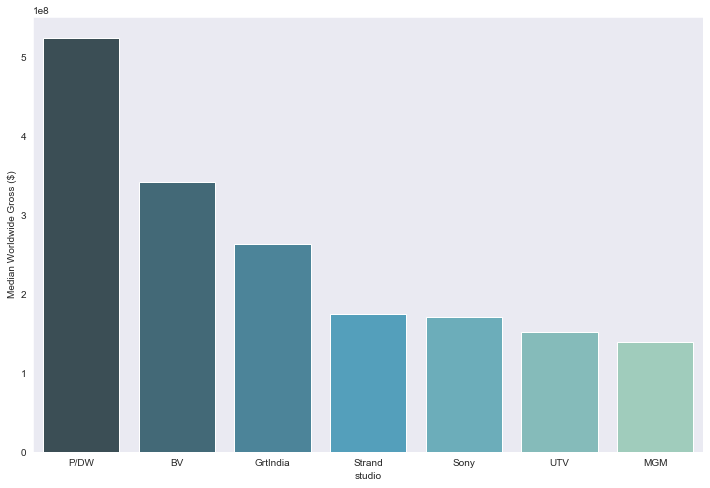

In [167]:
fig, ax = plt.subplots(figsize = (12,8))
sns.barplot(x='studio', y = ('worldwide_gross','median'), data = table_4a, palette = "GnBu_d", order = table_4a['studio'])
plt.ylabel('Median Worldwide Gross ($)')

##### Based on total movies produced

In [92]:
#Creating a table which only has the data from the top 7 studio
table_4b = table_4.loc[(table_4['studio']==table_4a['studio'][0])|(table_4['studio']==table_4a['studio'][1])|(table_4['studio']==table_4a['studio'][2])|(table_4['studio']==table_4a['studio'][3])|(table_4['studio']==table_4a['studio'][4])|(table_4['studio']==table_4a['studio'][5])|(table_4['studio']==table_4a['studio'][6])]
table_4b

,title,studio,domestic_gross_y,worldwide_gross,genres
0,Toy Story 3,BV,415004880.0,1.068880e+09,"Adventure,Animation,Comedy"
2,Shrek Forever After,P/DW,238736787.0,7.562447e+08,"Adventure,Animation,Comedy"
5,Tangled,BV,200821936.0,5.864772e+08,"Adventure,Animation,Comedy"
7,How to Train Your Dragon,P/DW,217581232.0,4.948710e+08,"Action,Adventure,Animation"
9,The Karate Kid,Sony,176591618.0,3.517749e+08,"Action,Drama,Family"
...,...,...,...,...,...
1505,The Equalizer 2,Sony,102084362.0,1.904531e+08,"Action,Crime,Thriller"
1506,The Nutcracker and the Four Realms,BV,54858851.0,1.702939e+08,"Adventure,Family,Fantasy"
1513,A Wrinkle in Time,BV,100478608.0,1.334019e+08,"Adventure,Family,Fantasy"
1534,Goosebumps 2: Haunted Halloween,Sony,46697321.0,9.329148e+07,"Adventure,Comedy,Family"


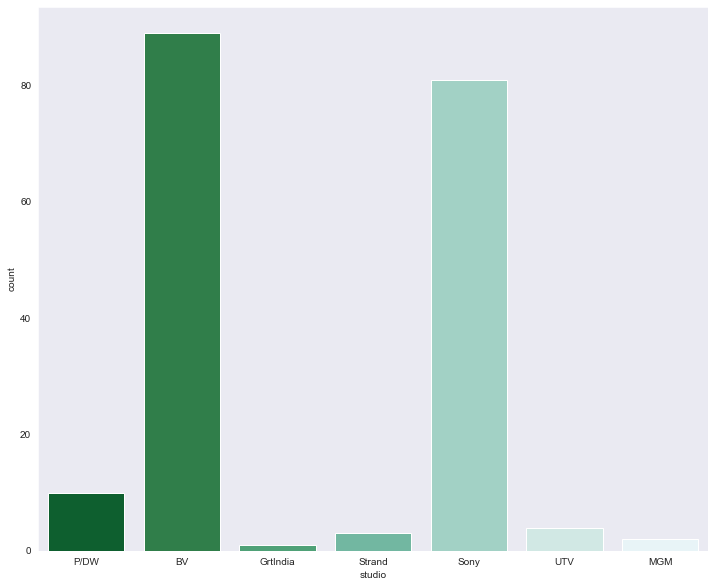

In [168]:
#Calculating and plotting the movie counts for each studio
fig, ax = plt.subplots(figsize = (12,10))
sns.countplot(x = 'studio', data = table_4b, palette = 'BuGn_r', order = table_4a['studio'])
# ax.set_xticklabels(table_4b['studio'], fontdict={'fontsize': 14});

### Summary

- Analysis based on the studios earning highest gross
- Considering the number of movies
- Highest grossing studios: P/DW, BW, GrtIndia
- Largest no. of movies produced by BV, followed by Sony. P/DW considerably lesser movies

### Recommendations

- Studio to majorly look for: BV as more movies with heighest gross
- P/DW upcomming studio to look out for


## Which Director and producer to hire?

### Directors and Producers Analysis ###

Directors and Producers selected based on both, producing highest grossing films with higher ratings

#### Creating the data table 

In [94]:
title_principals = data_tables['imdb.title.principals.csv.gz']
name_basics = data_tables['imdb.name.basics.csv.gz']
display(title_principals)
display(name_basics)

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,NaN,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,NaN,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,NaN,NaN
1028184,tt9692684,4,nm6009913,writer,writer,NaN


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
...,...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress,NaN
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN


In [95]:
df_merge = name_basics.merge(title_principals, on='nconst', how = 'inner')
df_merge_selected = df_merge[['primary_name','category', 'primary_profession', 'tconst']]
df_merge_selected

,primary_name,category,primary_profession,tconst
0,Mary Ellen Bauder,producer,"miscellaneous,production_manager,producer",tt2398241
1,Joseph Bauer,composer,"composer,music_department,sound_department",tt0433397
2,Joseph Bauer,composer,"composer,music_department,sound_department",tt1681372
3,Joseph Bauer,composer,"composer,music_department,sound_department",tt2387710
4,Joseph Bauer,composer,"composer,music_department,sound_department",tt2281215
...,...,...,...,...
1027907,Susan Grobes,actress,actress,tt6527982
1027908,Joo Yeon So,actress,actress,tt8737130
1027909,Madeline Smith,actress,actress,tt8734436
1027910,Michelle Modigliani,producer,producer,tt8739240


##### Merging with Genre and Gross #####

In [96]:
#Selecting the relevant columns
genre_n_gross = df_bud_genre[['tconst', 'production_budget', 'domestic_gross', 'worldwide_gross', 'genres', 'averagerating']]
genre_n_gross

,tconst,production_budget,domestic_gross,worldwide_gross,genres,averagerating
0,tt1775309,425000000.0,760507625.0,2.776345e+09,Horror,6.1
1,tt1298650,410600000.0,241063875.0,1.045664e+09,"Action,Adventure,Fantasy",6.6
2,tt6565702,350000000.0,42762350.0,1.497624e+08,"Action,Adventure,Sci-Fi",6.0
3,tt2395427,330600000.0,459005868.0,1.403014e+09,"Action,Adventure,Sci-Fi",7.3
4,tt4154756,300000000.0,678815482.0,2.048134e+09,"Action,Adventure,Sci-Fi",8.5
...,...,...,...,...,...,...
3810,tt5936960,10000.0,94596.0,9.459600e+04,NaN,NaN
3811,tt6616538,10000.0,527.0,5.270000e+02,NaN,NaN
3812,tt1880418,9000.0,4584.0,4.584000e+03,"Comedy,Drama",6.4
3813,tt7837402,7000.0,0.0,0.000000e+00,"Horror,Sci-Fi,Thriller",5.6


In [97]:
#Merge
table_3 = genre_n_gross.merge(df_merge_selected, on = 'tconst', how = 'inner')
table_3

,tconst,production_budget,domestic_gross,worldwide_gross,genres,averagerating,primary_name,category,primary_profession
0,tt1775309,425000000.0,760507625.0,2.776345e+09,Horror,6.1,YÃ»suke Yamada,writer,writer
1,tt1775309,425000000.0,760507625.0,2.776345e+09,Horror,6.1,Ai Hashimoto,actress,actress
2,tt1775309,425000000.0,760507625.0,2.776345e+09,Horror,6.1,TÃ´ru Hirao,cinematographer,"cinematographer,executive"
3,tt1775309,425000000.0,760507625.0,2.776345e+09,Horror,6.1,Nako Mizusawa,actress,actress
4,tt1775309,425000000.0,760507625.0,2.776345e+09,Horror,6.1,Hideki Ikari,composer,composer
...,...,...,...,...,...,...,...,...,...
32401,tt2107644,1400.0,0.0,0.000000e+00,"Drama,Horror,Thriller",5.4,Maxwell Moody,actor,actor
32402,tt2107644,1400.0,0.0,0.000000e+00,"Drama,Horror,Thriller",5.4,Eva Boehnke,actress,actress
32403,tt2107644,1400.0,0.0,0.000000e+00,"Drama,Horror,Thriller",5.4,David Chandler,actor,actor
32404,tt2107644,1400.0,0.0,0.000000e+00,"Drama,Horror,Thriller",5.4,Benjamin Roberds,director,"camera_department,director,writer"


#### Cleaning the Final Table

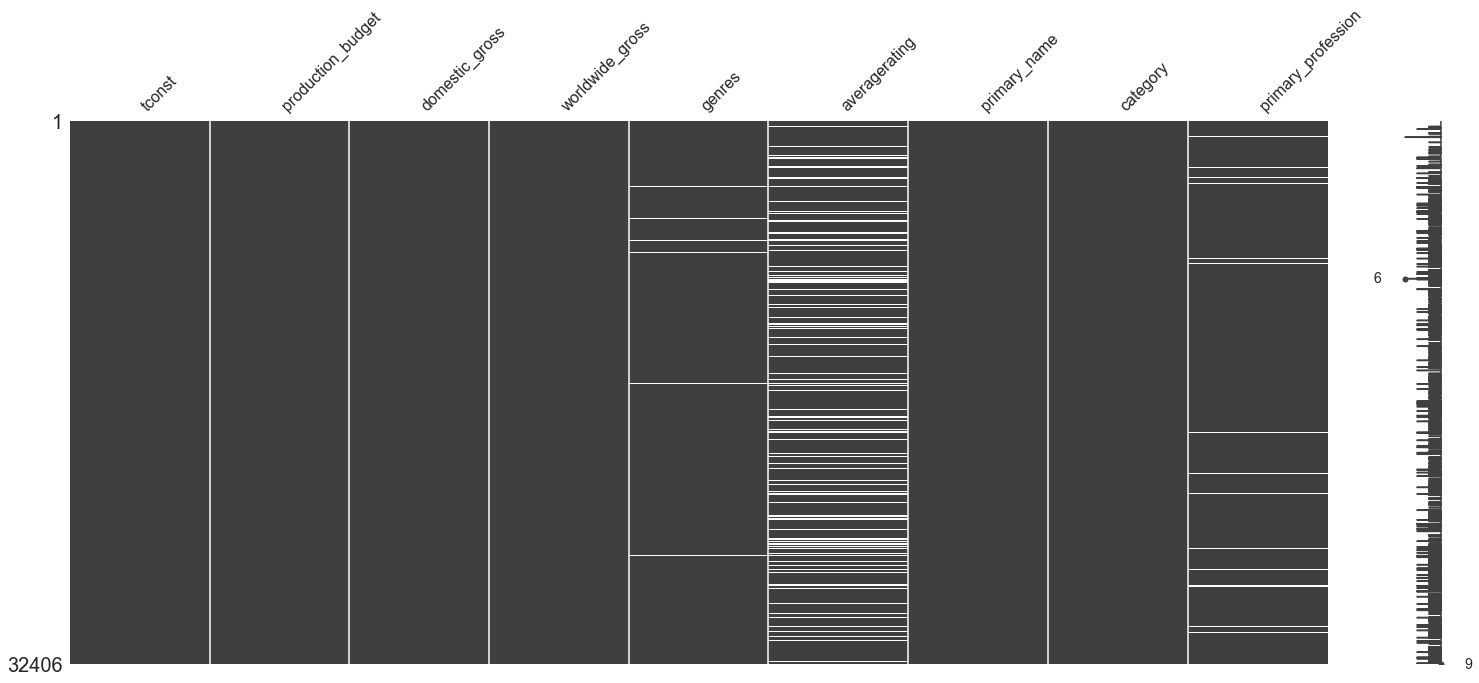

In [98]:
#Analyse Null Values
ms.matrix(table_3);

In [99]:
table_3['genres'] = table_3['genres'].fillna('N/A')

In [100]:
table_3.isna().sum()/len(table_3)

tconst                0.000000
production_budget     0.000000
domestic_gross        0.000000
worldwide_gross       0.000000
genres                0.000000
averagerating         0.162346
primary_name          0.000000
category              0.000000
primary_profession    0.016478
dtype: float64

In [101]:
table_3.dropna(subset = ['averagerating'], inplace = True)
print(table_3.isna().sum()/len(table_3))
table_3.reset_index(inplace=True)

tconst                0.00000
production_budget     0.00000
domestic_gross        0.00000
worldwide_gross       0.00000
genres                0.00000
averagerating         0.00000
primary_name          0.00000
category              0.00000
primary_profession    0.00991
dtype: float64


#### Creating tables for different job titles

In [102]:
#Exploring the job titles
job = list(table_3['category'].unique())
job

['writer',
 'actress',
 'cinematographer',
 'composer',
 'director',
 'actor',
 'producer',
 'editor',
 'production_designer',
 'self',
 'archive_sound',
 'archive_footage']

In [103]:
#Creating a function that would extract all relevan columns from the main data corresponding to the job title
def job_table(job_title = ''):
    """Takes a job and returns a DF with data of budget and gross values"""
    
    budget_gross = {}
    
    budget_gross['Name']=[]
    for index, genre in enumerate(table_3['category'].str.contains(job_title)):
        if genre:
            budget_gross['Name'].append(table_3['primary_name'][index])
    
    
    budget_gross['Budget']=[]
    for index, genre in enumerate(table_3['category'].str.contains(job_title)):
        if genre:
            budget_gross['Budget'].append(table_3['production_budget'][index])


    budget_gross['Worldwide Gross']=[]
    for index, genre in enumerate(table_3['category'].str.contains(job_title)):
        if genre:
            budget_gross['Worldwide Gross'].append(table_3['worldwide_gross'][index])


    budget_gross['Domestic Gross']=[]
    for index, genre in enumerate(table_3['category'].str.contains(job_title)):
        if genre:
            budget_gross['Domestic Gross'].append(table_3['domestic_gross'][index])


    budget_gross['Genre']=[]
    for index, genre in enumerate(table_3['category'].str.contains(job_title)):
        if genre:
            budget_gross['Genre'].append(table_3['genres'][index])
    
    budget_gross['Average Rating']=[]
    for index, genre in enumerate(table_3['category'].str.contains(job_title)):
        if genre:
            budget_gross['Average Rating'].append(table_3['averagerating'][index])
    
    
    budget_gross = pd.DataFrame(budget_gross)
    return budget_gross

#### Best Director

In [104]:
director = job_table(job_title = 'director')
director

,Name,Budget,Worldwide Gross,Domestic Gross,Genre,Average Rating
0,Atsushi Wada,425000000.0,2.776345e+09,760507625.0,Horror,6.1
1,Rob Marshall,410600000.0,1.045664e+09,241063875.0,"Action,Adventure,Fantasy",6.6
2,Simon Kinberg,350000000.0,1.497624e+08,42762350.0,"Action,Adventure,Sci-Fi",6.0
3,Joss Whedon,330600000.0,1.403014e+09,459005868.0,"Action,Adventure,Sci-Fi",7.3
4,Joe Russo,300000000.0,2.048134e+09,678815482.0,"Action,Adventure,Sci-Fi",8.5
...,...,...,...,...,...,...
2989,Jim Chuchu,15000.0,0.000000e+00,0.0,Drama,7.5
2990,Bill Yip,10000.0,9.459600e+04,94596.0,Drama,4.9
2991,Robert Rodriguez,7000.0,0.000000e+00,0.0,"Horror,Sci-Fi,Thriller",5.6
2992,Benjamin Roberds,1400.0,0.000000e+00,0.0,"Drama,Horror,Thriller",5.4


In [105]:
#Analysis Based on highest rating
top_10_director_r = director.groupby('Name').median().sort_values('Average Rating', ascending = False).head(10)
top_10_director_r['Average Rating']

Name
Ron Yassen            9.3
Ricardo Martinez      9.2
Richard Heap          9.2
Pete Middleton        9.2
Sam Campos            9.0
Brook Susan Parker    9.0
Angel Manuel Soto     9.0
David C. Kirtland     8.9
Milan Chams           8.9
Suman Upreti          8.9
Name: Average Rating, dtype: float64

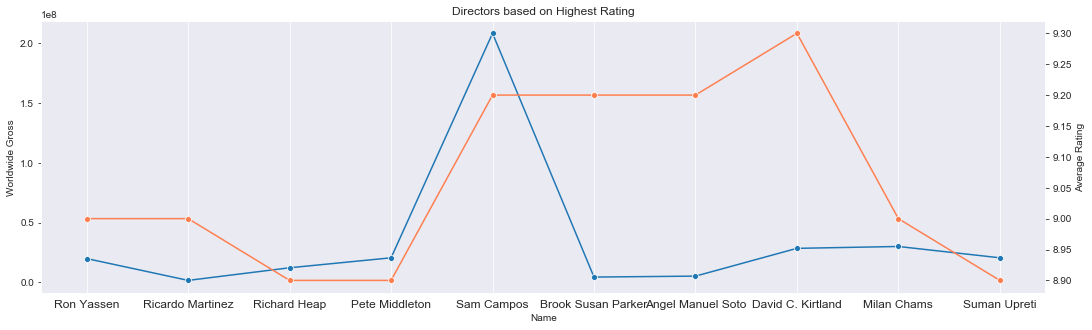

In [106]:
fig, ax = plt.subplots(figsize = (18,5))
ax1 = ax.twinx()
plot = sns.lineplot(x=top_10_director_r.index, y = 'Worldwide Gross',
                    data = top_10_director_r, ax=ax, marker = 'o',estimator='median')
plot_1 = sns.lineplot(x=top_10_director_r.index, y = 'Average Rating', data = top_10_director_r,
                      ax=ax1, color = 'coral', marker = 'o',estimator='median')
ax.grid(axis = 'x')
# plt.ylabel('Worlwide Gross ($)')
ax.set_title('Directors based on Highest Rating');
# ax.tick_params( axis='x', width=2);
ax.set_xticklabels(top_10_director_r.index, fontdict={'fontsize': 12})
ax1.set_xticklabels(top_10_director_r.index, fontdict={'fontsize': 12});
# ax.set_yticklabels(top_10_director_r['Worldwide Gross'], fontdict={'fontsize': 12})
# ax1.set_yticklabels(top_10_director_r['Average Rating'], fontdict={'fontsize': 12})
# ax1.set_yticklabels(ax1.get_yticklabels(), fontdict={'fontsize': 12});

In [107]:
director_counts =director['Name'].value_counts()
director_names=director_counts[director_counts>1].index
final_directors = director.loc[director['Name'].isin(director_names)]
final_directors.isna().sum()

Name               0
Budget             0
Worldwide Gross    0
Domestic Gross     0
Genre              0
Average Rating     0
dtype: int64

In [108]:
#Analysis Based on highest gross
top_10_director = final_directors.groupby('Name').median().sort_values('Worldwide Gross', ascending = False).head(10)
top_10_director['Average Rating']
# director['Name'].value_counts().loc['Ravi Punj']
top_10_director.isna().sum()

Budget             0
Worldwide Gross    0
Domestic Gross     0
Average Rating     0
dtype: int64

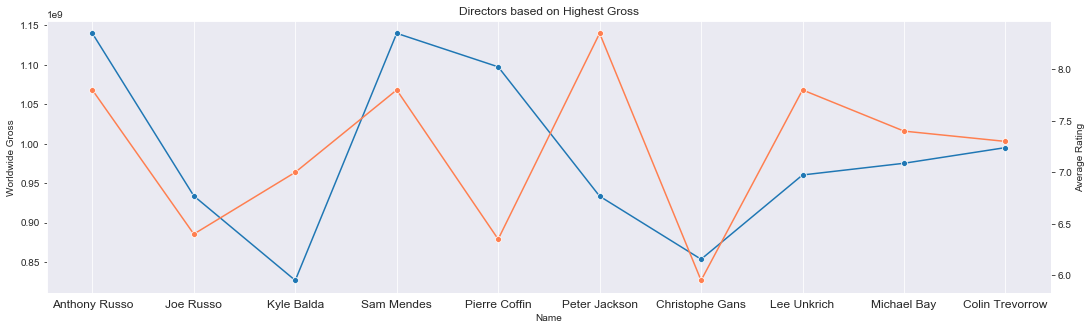

In [109]:
fig, ax = plt.subplots(figsize = (18,5))
ax1 = ax.twinx()
plot = sns.lineplot(x=top_10_director.index, y = 'Worldwide Gross', data = top_10_director, marker = 'o',
                    ax=ax, estimator='median')
plot_1 = sns.lineplot(x=top_10_director.index, y = 'Average Rating', data = top_10_director, ax=ax1,
                      marker = 'o', color = 'coral',estimator='median')
ax.grid(axis = 'x')
ax.set_title('Directors based on Highest Gross');
# plt.xticks(rotation=45)
ax.set_xticklabels(top_10_director.index, fontdict={'fontsize': 12})
ax1.set_xticklabels(top_10_director.index, fontdict={'fontsize': 12});
# ax.set_yticklabels(top_10_director['Worldwide Gross'], fontdict={'fontsize': 12})
# ax1.set_yticklabels(top_10_director['Average Rating'], fontdict={'fontsize': 12});

#### Best Producer

In [110]:
producer = job_table(job_title = 'producer')
top_10_producer_r = producer.groupby('Name').median().sort_values('Average Rating', ascending = False).head(10)
top_10_producer_r

,Budget,Worldwide Gross,Domestic Gross,Average Rating
Name,,,,
Lauren Griswold,6250000.0,28500000.0,18594333.5,9.3
Mark Thomas,9500000.0,5278632.0,3573673.0,9.2
Mario Roberto,9500000.0,5278632.0,3573673.0,9.2
Michele Rashida Turner,20000000.0,1703281.0,0.0,9.0
Melissa Caudle,15000000.0,12262065.0,9237470.0,8.9
Yvette L. Leli-Aragon,30000000.0,52880016.0,52880016.0,8.8
Lynn Mancinelli,5000000.0,67505.0,67505.0,8.8
Julie Sisson,5000000.0,67505.0,67505.0,8.8
Keith Lukowski,30000000.0,52880016.0,52880016.0,8.8


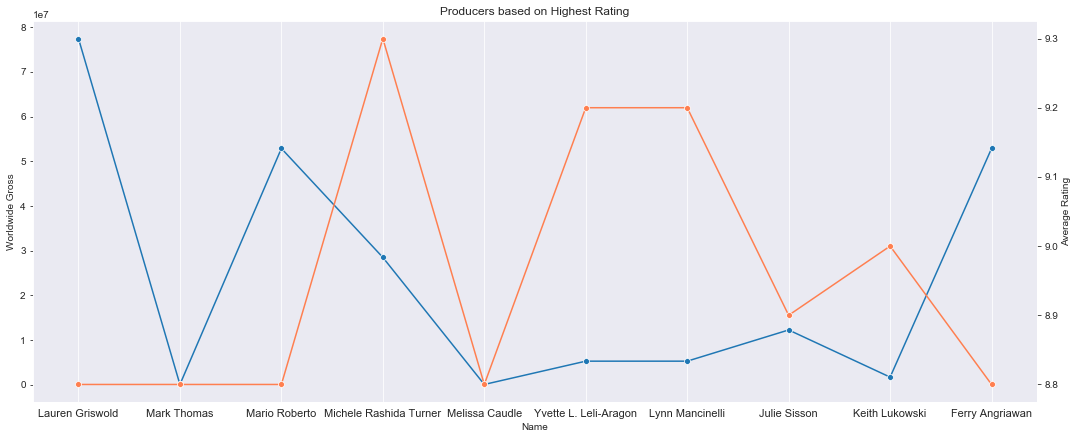

In [111]:
#Analysis Based on highest rating
fig, ax = plt.subplots(figsize = (18,7))
ax1 = ax.twinx()
plot = sns.lineplot(x=top_10_producer_r.index, y = 'Worldwide Gross', data = top_10_producer_r, 
                    ax=ax, estimator='median',marker = 'o')
plot_1 = sns.lineplot(x=top_10_producer_r.index, y = 'Average Rating', data = top_10_producer_r,
                      ax=ax1, color = 'coral',estimator='median',marker = 'o')
ax.set_xticklabels(top_10_producer_r.index, fontdict={'fontsize': 11})
ax1.set_xticklabels(top_10_producer_r.index, fontdict={'fontsize': 11})
ax.grid(axis = 'x')
ax.set_title('Producers based on Highest Rating');
# ax.set_yticklabels(top_10_producer['Worldwide Gross'], fontdict={'fontsize': 12})
# ax1.set_yticklabels(top_10_producer['Average Rating'], fontdict={'fontsize': 12});
# plt.xticks(rotation=45);

In [112]:
#Analysis Based on highest gross
producer = job_table(job_title = 'producer')
top_10_producer = producer.groupby('Name').median().sort_values('Worldwide Gross', ascending = False).head(10)
top_10_producer

,Budget,Worldwide Gross,Domestic Gross,Average Rating
Name,,,,
Sinn Gi Joseph Chan,150000000.0,1.272470e+09,400738009.0,5.4
Cory Neal,150000000.0,1.272470e+09,400738009.0,6.2
Peter Del Vecho,150000000.0,1.272470e+09,400738009.0,7.5
John Walker,200000000.0,1.242521e+09,608581744.0,7.7
Nicole Paradis Grindle,200000000.0,1.242521e+09,608581744.0,7.7
Kevin Feige,175000000.0,1.123062e+09,426525952.0,7.3
Barbara Broccoli,200000000.0,1.110527e+09,304360277.0,7.8
Tom DeSanto,195000000.0,1.104039e+09,245439076.0,6.2
Don Murphy,195000000.0,1.104039e+09,245439076.0,6.2


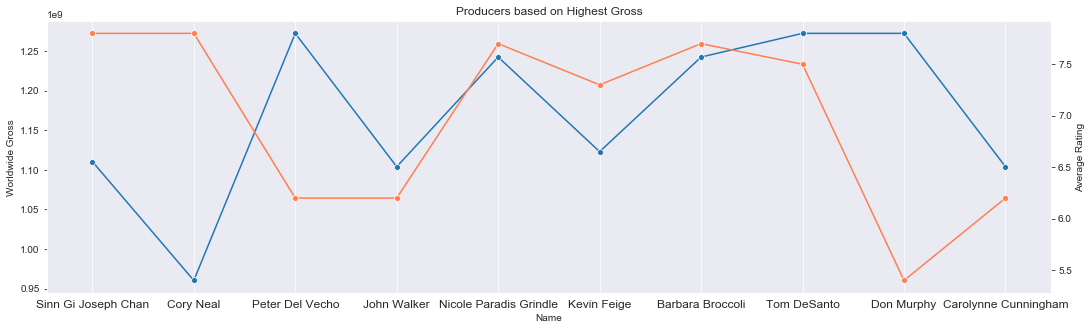

In [113]:
fig, ax = plt.subplots(figsize = (18,5))
ax1 = ax.twinx()
plot = sns.lineplot(x=top_10_producer.index, y = 'Worldwide Gross', data = top_10_producer,marker = 'o',
                    ax=ax, estimator='median')
plot_1 = sns.lineplot(x=top_10_producer.index, y = 'Average Rating', data = top_10_producer,marker = 'o',
                      ax=ax1, color = 'coral',estimator='median')
ax.set_xticklabels(top_10_producer.index, fontdict={'fontsize': 12})
ax1.set_xticklabels(top_10_producer.index, fontdict={'fontsize': 12})
ax.grid(axis = 'x')
ax.set_title('Producers based on Highest Gross');
# ax.set_yticklabels(top_10_producer['Worldwide Gross'], fontdict={'fontsize': 12})
# ax1.set_yticklabels(top_10_producer['Average Rating'], fontdict={'fontsize': 12});
# # plt.xticks(rotation=45);

### Summary

- Based on the highest Grossing and rating, Sam Campos has directed movies producing both higher gross and rating
- Anthony Russo: high revenue, rating 7.7 which is acceptable and most likely to be watched by majority of audience
- Based on the highest Grossing and rating, producer does not  show the same trend as directors and no one producer who has both high gross and rating. Best option: Lauren Griswold
- Nicole Paradis Grindle and Barbara Broccoli both have considerably higher gross and rating 7.5

### Recommendation

**Director:** Anthony Russo
**Producer:** either Nicole Paradis Grindle or Barbara Broccoli

## Best time to Debut?

### Release dates analysis ###

#### Creating the main table- table_5a ####

Creating table_5 by merging tn_movie_bud and df_bud_genre

In [114]:
df_bud_genre

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,tt1775309,Avatar,AbatÃ¢,2011,93.0,Horror,6.1,43.0
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",6.6,447624.0
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",6.0,24451.0
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594.0
4,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,68,"Jul 6, 2001",Cure,10000.0,94596.0,9.459600e+04,tt5936960,Cure,Cure,2014,NaN,NaN,NaN,NaN
3811,70,"Apr 1, 1996",Bang,10000.0,527.0,5.270000e+02,tt6616538,Bang,Bang,2015,NaN,NaN,NaN,NaN
3812,73,"Jan 13, 2012",Newlyweds,9000.0,4584.0,4.584000e+03,tt1880418,Newlyweds,Newlyweds,2011,95.0,"Comedy,Drama",6.4,1436.0
3813,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00,tt7837402,Red 11,Red 11,2019,77.0,"Horror,Sci-Fi,Thriller",5.6,43.0


In [115]:
table_5 = df_bud_genre[['movie', 'release_date', 'production_budget', 'worldwide_gross','domestic_gross', 'genres']]
table_5

,movie,release_date,production_budget,worldwide_gross,domestic_gross,genres
0,Avatar,"Dec 18, 2009",425000000.0,2.776345e+09,760507625.0,Horror
1,Pirates of the Caribbean: On Stranger Tides,"May 20, 2011",410600000.0,1.045664e+09,241063875.0,"Action,Adventure,Fantasy"
2,Dark Phoenix,"Jun 7, 2019",350000000.0,1.497624e+08,42762350.0,"Action,Adventure,Sci-Fi"
3,Avengers: Age of Ultron,"May 1, 2015",330600000.0,1.403014e+09,459005868.0,"Action,Adventure,Sci-Fi"
4,Avengers: Infinity War,"Apr 27, 2018",300000000.0,2.048134e+09,678815482.0,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...
3810,Cure,"Jul 6, 2001",10000.0,9.459600e+04,94596.0,NaN
3811,Bang,"Apr 1, 1996",10000.0,5.270000e+02,527.0,NaN
3812,Newlyweds,"Jan 13, 2012",9000.0,4.584000e+03,4584.0,"Comedy,Drama"
3813,Red 11,"Dec 31, 2018",7000.0,0.000000e+00,0.0,"Horror,Sci-Fi,Thriller"


#### Data cleaning and exploration ####

##### Null Values #####

In [116]:
table_5['genres']=table_5['genres'].fillna('N/A')

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



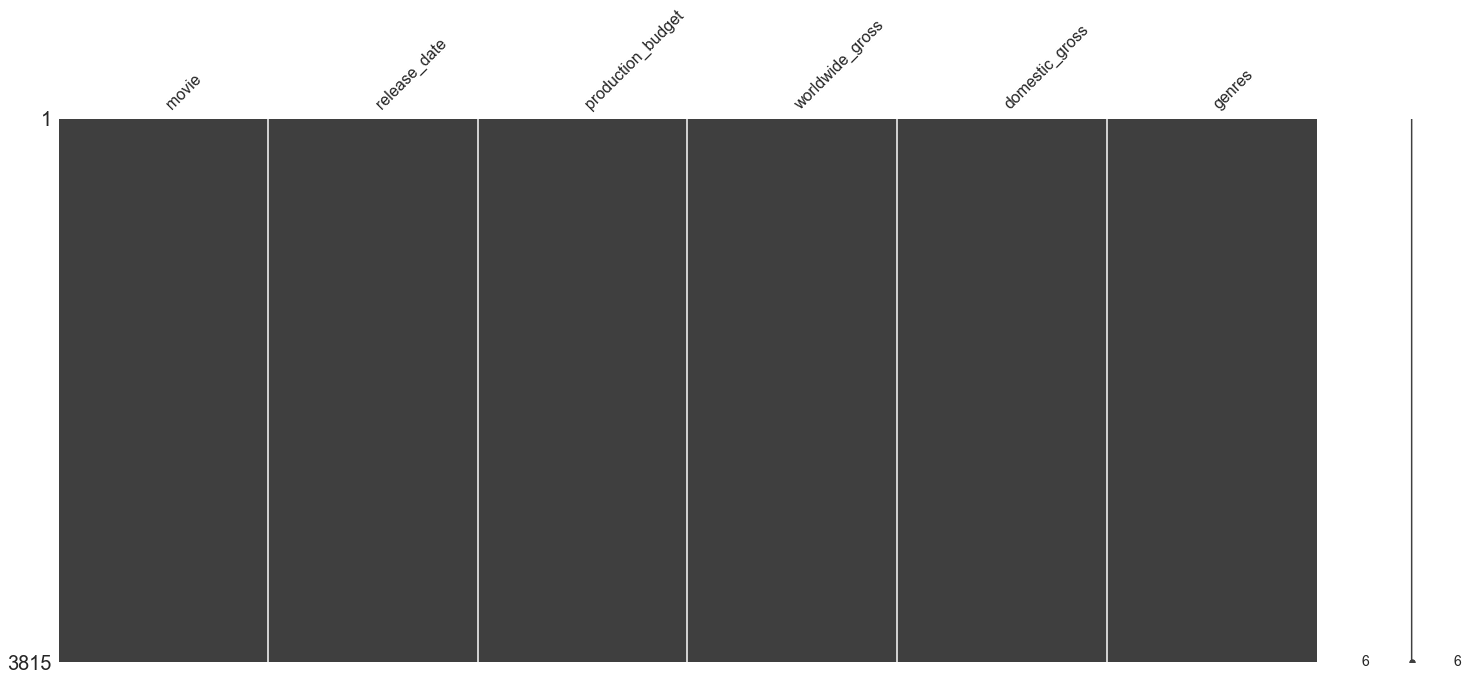

In [117]:
ms.matrix(table_5);

In [118]:
table_5.isna().sum()

movie                0
release_date         0
production_budget    0
worldwide_gross      0
domestic_gross       0
genres               0
dtype: int64

In [119]:
table_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3815 entries, 0 to 3814
Data columns (total 6 columns):
movie                3815 non-null object
release_date         3815 non-null object
production_budget    3815 non-null float64
worldwide_gross      3815 non-null float64
domestic_gross       3815 non-null float64
genres               3815 non-null object
dtypes: float64(3), object(3)
memory usage: 368.6+ KB


##### Converting to datetime #####

In [120]:
# converting date to datetime objects
table_5['release_date'] = pd.to_datetime(table_5['release_date'])
table_5['release_date']

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0      2009-12-18
1      2011-05-20
2      2019-06-07
3      2015-05-01
4      2018-04-27
          ...    
3810   2001-07-06
3811   1996-04-01
3812   2012-01-13
3813   2018-12-31
3814   2015-09-29
Name: release_date, Length: 3815, dtype: datetime64[ns]

##### Creating year and month columns #####

In [121]:
#extracting year
table_5['release_date'][0].year

2009

In [122]:
#Creating year column
table_5['Year'] = table_5['release_date'].map(lambda x: x.year)
table_5['Year']

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0       2009
1       2011
2       2019
3       2015
4       2018
        ... 
3810    2001
3811    1996
3812    2012
3813    2018
3814    2015
Name: Year, Length: 3815, dtype: int64

In [123]:
#exploring total years
table_5['Year'].sort_values(ascending = False)

498     2020
1044    2019
387     2019
126     2019
2589    2019
        ... 
3588    1931
3304    1927
3305    1927
3306    1927
2417    1915
Name: Year, Length: 3815, dtype: int64

In [124]:
import datetime

In [125]:
#extracting short month
table_5['release_date'][0].strftime('%b')

'Dec'

In [126]:
# creating month table
table_5['Month']=table_5['release_date'].map(lambda x: x.strftime('%b'))
table_5['Month']

C:\Users\19035\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0       Dec
1       May
2       Jun
3       May
4       Apr
       ... 
3810    Jul
3811    Apr
3812    Jan
3813    Dec
3814    Sep
Name: Month, Length: 3815, dtype: object

#### Analysis ####

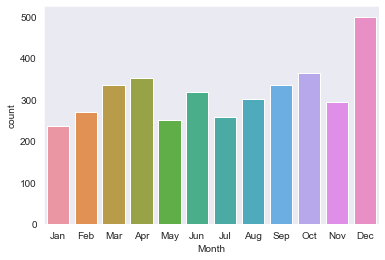

In [127]:
#Initial analysis for all years
month_order = ['Jan', 'Feb', 'Mar','Apr','May','Jun','Jul','Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.countplot(x='Month', data = table_5, order = month_order)

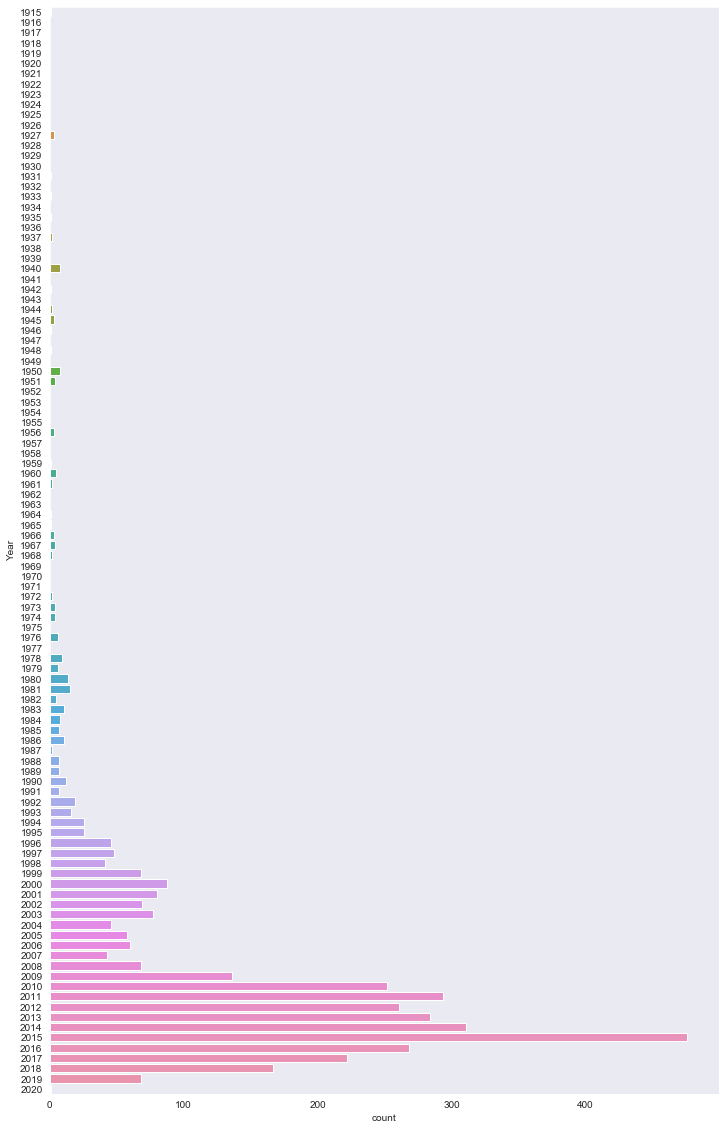

In [128]:
#Number of movies released each year
year_order=list(range(1915,2021))
fig, ax = plt.subplots(figsize = (12,20))
sns.countplot(y='Year', data = table_5, order = year_order);

#### Analysing last 10 years ####

In [129]:
#creating a data table for last 10 years
table_5a = table_5.loc[(table_5['Year']>2010) & (table_5['Year']!=2020)]
table_5a

,movie,release_date,production_budget,worldwide_gross,domestic_gross,genres,Year,Month
1,Pirates of the Caribbean: On Stranger Tides,2011-05-20,410600000.0,1.045664e+09,241063875.0,"Action,Adventure,Fantasy",2011,May
2,Dark Phoenix,2019-06-07,350000000.0,1.497624e+08,42762350.0,"Action,Adventure,Sci-Fi",2019,Jun
3,Avengers: Age of Ultron,2015-05-01,330600000.0,1.403014e+09,459005868.0,"Action,Adventure,Sci-Fi",2015,May
4,Avengers: Infinity War,2018-04-27,300000000.0,2.048134e+09,678815482.0,"Action,Adventure,Sci-Fi",2018,Apr
5,Justice League,2017-11-17,300000000.0,6.559452e+08,229024295.0,"Action,Adventure,Fantasy",2017,Nov
...,...,...,...,...,...,...,...,...
3806,The Ridges,2011-11-25,17300.0,0.000000e+00,0.0,"Drama,Horror,Thriller",2011,Nov
3807,Stories of Our Lives,2014-12-31,15000.0,0.000000e+00,0.0,Drama,2014,Dec
3812,Newlyweds,2012-01-13,9000.0,4.584000e+03,4584.0,"Comedy,Drama",2012,Jan
3813,Red 11,2018-12-31,7000.0,0.000000e+00,0.0,"Horror,Sci-Fi,Thriller",2018,Dec


In [130]:
table_5a['Year'].unique()

array([2011, 2019, 2015, 2018, 2017, 2012, 2013, 2016, 2014], dtype=int64)

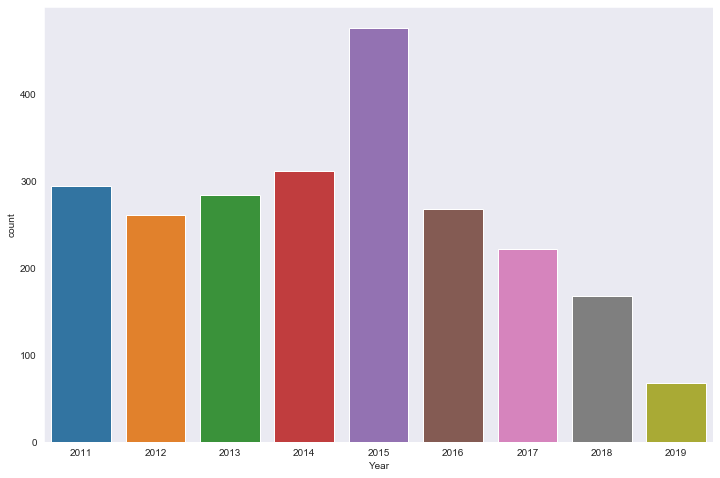

In [131]:
#Yearly analysis
fig, ax = plt.subplots(figsize = (12,8))
sns.countplot(x='Year', data = table_5a);

In [132]:
# month_order = ['Jan', 'Feb', 'Mar','Apr','May','Jun','Jul','Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# fig, ax = plt.subplots(figsize = (12,8))
# sns.swarmplot(x='Year', y = 'Month', data = table_5a, order = month_order);

Swarm, Strip

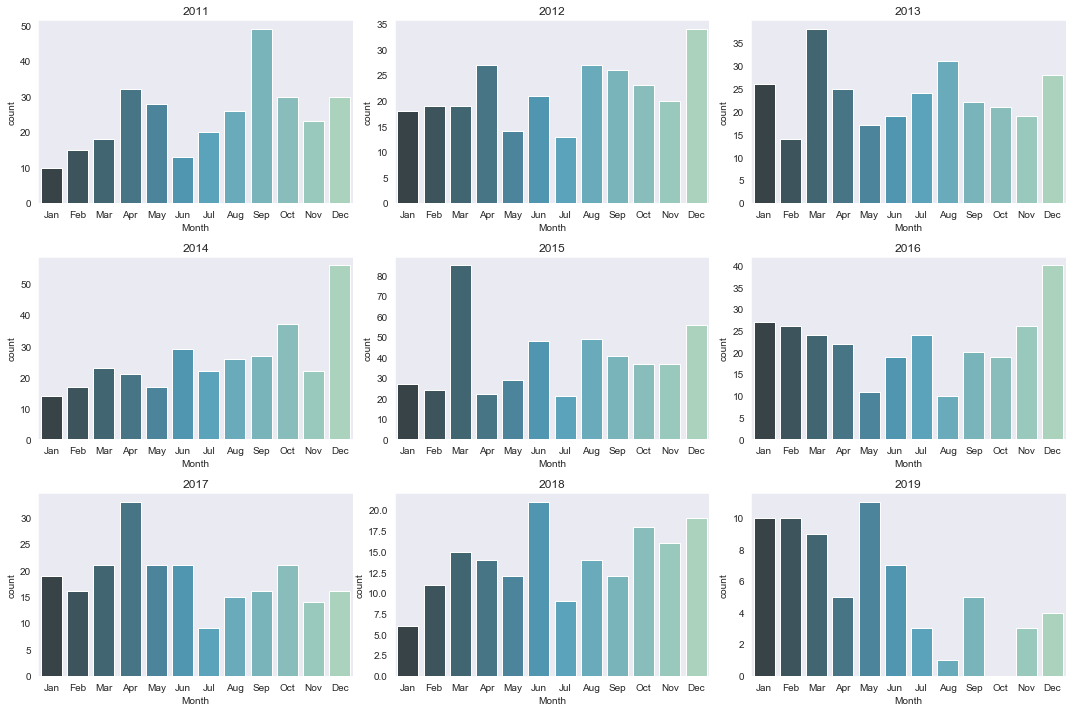

In [133]:
#month analysis for each year
month_order = ['Jan', 'Feb', 'Mar','Apr','May','Jun','Jul','Aug', 'Sep', 'Oct', 'Nov', 'Dec']
fig,axes =plt.subplots(ncols=3, nrows=3, figsize =(15,10))
axes = axes.flatten()
for i,j in enumerate(pd.Series(table_5a['Year'].unique()).sort_values()):
    sns.countplot(x='Month', data = table_5a.loc[table_5a['Year']==j], ax=axes[i], order = month_order, palette = "GnBu_d")
    axes[i].set_title(j);
plt.tight_layout()

Swarm or strip

In [134]:
table_5b = table_5.loc[(table_5['Year']>2016) & (table_5['Year']!=2020)]

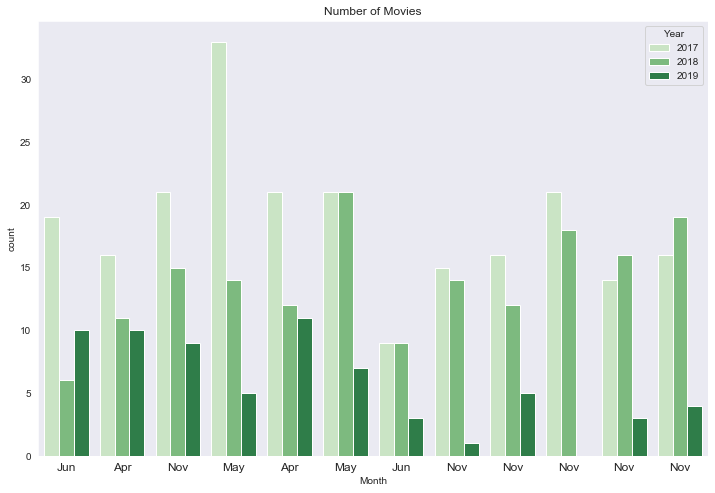

In [135]:
fig, ax = plt.subplots(figsize = (12,8))
sns.countplot(x='Month', hue = 'Year', data = table_5b, order = month_order, palette = 'Greens')
ax.set_xticklabels(table_5b['Month'], fontdict={'fontsize': 12})
plt.title('Number of Movies');

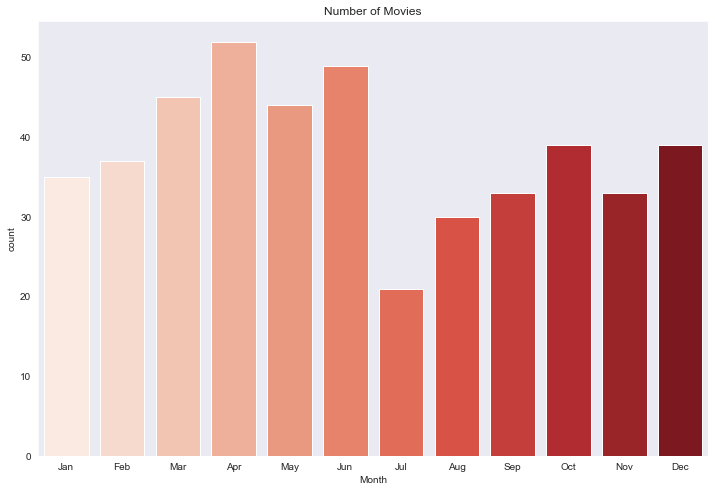

In [136]:
fig, ax = plt.subplots(figsize = (12,8))
sns.countplot(x='Month', data = table_5b, order = month_order, palette = 'Reds')
plt.title('Number of Movies');
# ax.set_xticklabels(table_5b['Month'], fontdict={'fontsize': 12});

### Summary ###

- number of movies releasing per year seen to decrease, changes being drastic in 2019, as the outbreak of corona begun during the last months.
- looking at last 10 months, no general trend per se 
- Comparing with the last 3 years, most of the movies were released in the months of march to june, rising and falling in alternating months within a small range, and then drastically dropping in july
- rise in the numbers increasing during holidays like halloween, christmas, new years: oct, dec-feb


### Recommendations

- While making a holiday themed movie might be an option as more people would come and watch the movie, but there remains higher competition which on other hand does not work well for some studios.
- On the other hand, releasing a movie in the lowest time like July is also not viable as lot of target audience would have spent during the holidays and maynot want to spend on another movie just yet, unless it turns out to be a superhit. Even then, we might see a comparatively lower turnaround.
- The best time to release a debut would then be close to the holidays. yet leaving some time in the middle, that would be in the months of August and September.

# Recommendations

1. **Genre**: Debuting with the most common genre: Animation is the safest bet to debut with, however, multiple genres advised: Animation, Adventure, Fantasy or Adventure, Action, Family. Will give sufficient options of scripts to decide from.
2. **Runtime**: While runtime didn’t have a greater impact, recommended to keep it between 90-120 mins
3. **The Makers**: Should try hiring Sam Campos as Director and either Nicole Paradis Grindle or Barbara Broccoli as producer since they have the best history of creating movies liked by audience and generating high revenue
4. **Release Time**: The best time to release a debut is close to the holidays, yet leaving some time in the middle, that would be in the months of August and September.
5. **The Competitors**:BV has been long time in the industry and have been performing at the highest levels. Rising studio to look out for: P/DW

# Future Work

- **Region** :Analysing the regions where the movies can be based /released to
- **Culture**: multi cultured movie may attract a higher worldwide gross
- **Language**: target audience language analysis, and analyzing foreign language movies
- **Jobs based on genre combined with rating**: some casts/makers do better in some genres and not others. based on our decision, further analyse these aspects to finalize the jobs

# Older Work #

In [137]:
bom_movie_gross = data_tables['bom.movie_gross.csv.gz']
bom_movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [138]:
trial_2b = bom_movie_gross.merge(trial, left_on = 'title', right_on = 'original_title', how = 'inner')
trial_2b

,title,studio,domestic_gross,foreign_gross,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218.0
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066.0
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",6.3,167532.0
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733.0
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2771,The Escape,IFC,14000.0,NaN,2018,tt6069126,The Escape,The Escape,2017,101.0,Drama,5.9,1290.0
2772,Souvenir,Strand,11400.0,NaN,2018,tt2387692,Souvenir,Souvenir,2016,90.0,"Drama,Music,Romance",6.0,823.0
2773,Souvenir,Strand,11400.0,NaN,2018,tt2389092,Souvenir,Souvenir,2014,86.0,"Comedy,Romance",5.9,9.0
2774,Souvenir,Strand,11400.0,NaN,2018,tt3478898,Souvenir,Souvenir,2014,86.0,Documentary,NaN,NaN


In [139]:
(trial_2b['year'] == trial_2b['start_year']).sum()

1666

In [140]:
common_columns_dict = {}
for title, table in data_tables.items():
    if common_columns(table, data_tables):
        common_columns_dict[title] = common_columns(table, data_tables)

### Individual Table Analysis ###

In [141]:
data_tables.keys()

dict_keys(['bom.movie_gross.csv.gz', 'imdb.name.basics.csv.gz', 'imdb.title.akas.csv.gz', 'imdb.title.basics.csv.gz', 'imdb.title.crew.csv.gz', 'imdb.title.principals.csv.gz', 'imdb.title.ratings.csv.gz', 'rt.movie_info.tsv.gz', 'rt.reviews.tsv.gz', 'tmdb.movies.csv.gz', 'tn.movie_budgets.csv.gz'])

#### bom.movie_gross.csv.gz ####

In [142]:
bom_movie_gross = data_tables['bom.movie_gross.csv.gz']
bom_movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [143]:
display(bom_movie_gross.info())
bom_movie_gross.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


None

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

#### imdb.name.basics.csv.gz ####

In [144]:
imdb_name_basics = data_tables['imdb.name.basics.csv.gz']
imdb_name_basics

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
...,...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress,NaN
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN


In [145]:
display(imdb_name_basics.info())
imdb_name_basics.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
nconst                606648 non-null object
primary_name          606648 non-null object
birth_year            82736 non-null float64
death_year            6783 non-null float64
primary_profession    555308 non-null object
known_for_titles      576444 non-null object
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


None

nconst                     0
primary_name               0
birth_year            523912
death_year            599865
primary_profession     51340
known_for_titles       30204
dtype: int64

#### 'imdb.title.akas.csv.gz' ####

In [146]:
imdb_title_akas = data_tables['imdb.title.akas.csv.gz']
imdb_title_akas

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,ÐÐ¶ÑÑÐ°ÑÐ¸Ðº ÑÐ²ÑÑ,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,NaN,NaN,original,NaN,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0
331700,tt9880178,1,La atenciÃ³n,NaN,NaN,original,NaN,1.0
331701,tt9880178,2,La atenciÃ³n,ES,NaN,NaN,NaN,0.0


In [147]:
display(imdb_title_akas.info())
imdb_title_akas.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
title_id             331703 non-null object
ordering             331703 non-null int64
title                331703 non-null object
region               278410 non-null object
language             41715 non-null object
types                168447 non-null object
attributes           14925 non-null object
is_original_title    331678 non-null float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


None

title_id                  0
ordering                  0
title                     0
region                53293
language             289988
types                163256
attributes           316778
is_original_title        25
dtype: int64

#### imdb.title.basics.csv.gz ####

In [148]:
imdb_title_basics = data_tables['imdb.title.basics.csv.gz']
imdb_title_basics

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho TeÃ³philo - O Legado de um Pioneiro,Rodolpho TeÃ³philo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [149]:
display(imdb_title_basics.info())
imdb_title_basics.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


None

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [150]:
imdb_title_basics.columns

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')

#### imdb.title.crew.csv.gz ####

In [151]:
data_tables['imdb.title.crew.csv.gz'].columns

Index(['tconst', 'directors', 'writers'], dtype='object')

#### imdb.title.principals.csv.gz ####

In [152]:
data_tables['imdb.title.principals.csv.gz']

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,NaN,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,NaN,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,NaN,NaN
1028184,tt9692684,4,nm6009913,writer,writer,NaN


#### imdb.title.ratings.csv.gz ####

In [153]:
imdb_title_ratings = data_tables['imdb.title.ratings.csv.gz']
imdb_title_ratings

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [154]:
display(imdb_title_ratings.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
tconst           73856 non-null object
averagerating    73856 non-null float64
numvotes         73856 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


None

#### rt.movie_info.tsv.gz ####

In [155]:
data_tables['bom.movie_gross.csv.gz']

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


#### rt.reviews.tsv.gz ####

In [156]:
data_tables['bom.movie_gross.csv.gz']

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


#### tmdb.movies.csv.gz ####

In [157]:
data_tables['bom.movie_gross.csv.gz']

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


#### tn.movie_budgets.csv.gz ####

In [158]:
data_tables['bom.movie_gross.csv.gz']

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
